# Prediction of Refurbished Laptops' Price in Singapore 
<font size="3">Created by:<br>
Group 9<br>
Diana, Leonardo Edgar, Wynona Raissa Nurmalupitasari<br>
Github Project URL: https://github.com/leonardoedgar/notebook-engine
</font>
<hr>

# Outline

1. [Introduction](#1.-Introduction)
2. [Web Scraping](#2.-Web-Scraping)<br> <br>
    2.1 [Ebay Scraper](#2.1-Ebay-Scraper)<br>
    2.2 [Reebelo Scraper](#2.2-Reebelo-Scraper)<br>
    2.3 [Laptop Factory Outlet Scraper](#2.3-Laptop-Factory-Outlet-Scraper)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;2.3.1 [Data Cleaning](#2.3.1-Data-Cleaning)<br>
    2.4 [Electronics Crazy Scraper](#2.4-Electronics-Crazy-Scraper)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;2.4.1 [Data Cleaning](#2.4.1-Data-Cleaning)<br>
    2.5 [Merge Web Scraping Data](#2.5-Merge-Web-Scraping-Data)<br> <br>
3. [Data Cleaning](#3.-Data-Cleaning)<br>
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis-(EDA))<br> <br>
    4.1 [Histogram and Bar Plot](#4.1-Histogram-and-Bar-Plot)<br>
    4.2 [Boxplot](#4.2-Boxplot)<br>
    4.3 [Correlation Heatmap (excl. Categorical Features)](#4.3-Correlation-Heatmap-(excl.-Categorical-Features))<br>
    4.4 [Correlation Heatmap (incl. Categorical Features)](#4.4-Correlation-Heatmap-(incl.-Categorical-Features))<br>
    &nbsp;&nbsp;&nbsp;&nbsp;4.4.1 [Encoding](#4.4.1-Encoding)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.1.1 [One-Hot Encoding](#4.4.1.1-One-Hot-Encoding)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.1.2 [Label Encoding](#4.4.1.2-Label-Encoding)<br> <br>
5. [Data Analysis](#5.-Data-Analysis)<br> <br>
    5.1 [Feature Scaling](#5.1-Feature-Scaling)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;5.1.1 [Min-Max Normalization](#5.1.1-Min-Max-Normalization)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;5.1.2 [Z-Scoring](#5.1.2-Z-Scoring)<br>
    5.2 [Models](#5.2-Models)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;5.2.1 [Polynomial Regression](#5.2.1-Polynomial-Regression)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;5.2.2 [Regularization with Ridge and Lasso Regression](#5.2.2-Regularization-with-Ridge-and-Lasso-Regression)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.2.1 [Ridge Regression](#5.2.2.1-Ridge-Regression)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.2.2 [Lasso Regression](#5.2.2.2-Lasso-Regression)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;5.2.3 [Random Forest](#5.2.3-Random-Forest)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;5.2.4 [AdaBoost](#5.2.4-AdaBoost)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;5.2.5 [XGBoost](#5.2.5-XGBoost)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;5.2.6 [Gradient Boosting Regressor](#5.2.6-Gradient-Boosting-Regressor)<br> <br>
6. [Results](#6.-Results)<br>
    6.1 [Min Max Normalization Data](#6.1-Min-Max-Normalization-Data) <br>
    6.2 [Z-Scoring Data](#6.2-Z-Scoring-Data) <br>
    6.3 [Data without Price Outliers](#6.3-Data-without-Price-Outliers) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3.1 [Data without Outliers with Min Max Normalization](#6.3.1-Data-without-Outliers-with-Min-Max-Normalization) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3.2 [Data without Outliers with Z-Scoring](#6.3.2-Data-without-Outliers-with-Z-Scoring) <br>
7. [Conclusion](#7.-Conclusion)<br>
8. [Challenges and Further Improvements](#8.-Challenges-and-Further-Improvements)<br>
9. [References](#9.-References)<br>

# 1. Introduction
[Back to Outline](#Outline)

Refurbished laptops market in Asia Pacific is expected to account for the second highest revenue (~ $ 1.4 billion) by the end of 2027. This is due to the increase in consumers’ awareness about e-waste and the opportunity of purchasing laptops at an affordable price. However, purchasing refurbished laptop is a challenging task as there are still little resources to educate consumers on whether they purchase the laptop at a fair value or not. For example, which laptop specifications they should consider when comparing prices from different websites. The fact that the refurbished laptop market is estimated to grow rapidly and consumers’ knowledge regarding the market is still low present us with many opportunities to develop a data science tool to increase market awareness and thus promote the growth of the global refurbished market. 

<b> Objectives </b>
- Determine which brand and model have the highest number of listings in refurbished laptops marketplace.
- Determine which specifications (features) have high influence to the price of the refurbished laptops.
- Predict price of refurbished laptops based on their specifications (features).

<b>Workflow Overview</b>

<img src="images/workflow.png">

<b> Libraries </b>

In [1]:
# scraping libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from datetime import datetime, date
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# necessary libraries for data analysis
from tqdm import tqdm
from typing import List, Dict
import pandas as pd
import os
import openpyxl
import time
import json
import numpy as np
import re

# visualization libraries
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns
%matplotlib inline
set_matplotlib_formats('retina', quality=100)

# machine learning libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn import datasets
from sklearn import metrics
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# 2. Web Scraping
[Back to Outline](#Outline)

The data for this project were retrieved directly from 4 websites: <a href = "https://www.ebay.com/e/_electronics/certified-refurbished-laptop-savings?rt=nc&LH_ItemCondition=4"> Ebay </a>, <a href = "https://www.reebelo.com/collections/laptops"> Reebelo </a>, <a href = "https://www.electronicscrazy.sg/refurbished-items/laptops/"> Electronics Crazy </a>, and <a href="https://laptopfactoryoutlet.com.sg/product-category/laptops/used-refurbished-secondhand-laptops/"> Laptop Factory Outlet </a> using web scraping method. Web scraping is a technique for targetted, automated extraction of information from websites which allows us to collect the most recent data from the aforementioned websites and capture the most accurate trend of refurbished laptop price in Singapore. We opted Selenium as our web scraping library because the API is beginner-friendly and it supports multiple browsers. With Selenium, we were also able to build a scalable web scraping pipeline which allows us to easily extract and update the collected data. 

<b> The features obtained by using the webscraping method are: </b>

| No. | Column Name | Data Type | Unit | Description |
| :- | :- | :- | :- | :- |
| 1. | title | string | - | The title shown in the website page |
| 2. | price | float | SGD | The price of the refurbished laptop |
| 3. | brand | string | - | The brand of the refurbished laptop, e.g. Dell |
| 4. | level_1_model | string | - | The model of the refurbished laptop, e.g. Latitude |
| 5. | level_2_model | string | - | The more detailed model, e.g. 5404 |
| 6. | resolution | string | - | The screen resolution, e.g. fhd, qhd |
| 7. | screen_size | float | inch | The screen size of the refurbished laptop |
| 8. | operating_system | string | - | The operating system, e.g. windows |
| 9. | processor | string | - | The processor name, e.g. intel core i7 |
| 10. | processor_speed | float | GHz | The processor speed |
| 11. | ram | float | GB | The Random Access Memory (RAM) of the refurbished laptop |
| 12. | warranty | integer | month | The duration of the warranty provided by the website |
| 13. | link | string | - | The link to the website page (for debugging purposes) |
| 14. | weight | float | kg | The weight of the refurbished laptop | 
| 15. | ssd | integer | GB | The SSD storage of the refurbished laptop |
| 16. | hdd | integer | GB | The HDD storage of the refurbished laptop |
| 17. | product_description | string | - | Full product description shown in the website page | 
| 18. | graphics_card | string | - | The graphics card name of the refurbished laptop |

<u>Note:</u> Some features, such as <i>level_1_model</i>, were parsed from either the description or title columns because some of the websites do not provide those columns directly.

<b> We were able to retrieve the following numbers of data from each website: </b>

| No. | Website | Number of Data |
| :- | :- | :- |
| 1. | <a href = "https://laptopfactoryoutlet.com.sg/product-category/laptops/used-refurbished-secondhand-laptops/"> Laptop Factory Outlet </a> | 123 | 
| 2. | <a href = "https://www.ebay.com/e/_electronics/certified-refurbished-laptop-savings?rt=nc&LH_ItemCondition=4"> Ebay </a> | 58 |
| 3. | <a href = "https://www.reebelo.com/collections/laptops"> Reebelo </a> | 45 |
| 4. | <a href = "https://www.electronicscrazy.sg/refurbished-items/laptops/"> Electronics Crazy </a> | 76 |
| <b> Total </b> | | <b> 302 </b> |

### 2.1 Ebay Scraper
[Back to Outline](#Outline)

In [2]:
class ScraperBase(object):
    def __init__(self, webdriver: webdriver, name: str, web_url: str) -> None:
        self._webdriver = webdriver
        self._name = name
        self._web_url = web_url
        self._storage = {}
    
    def _search_desired_item(self) -> None:
        raise NotImplementedError
    
    def _get_all_product_links(self) -> List[str]:
        raise NotImplementedError
    
    def _parse_data(self, link: str) -> None:
        raise NotImplementedError
    
    def run(self) -> Dict:
        start_time = time.time()
        self._webdriver.get(self._web_url)
        self._search_desired_item()
        links = self._get_all_product_links()
        print("Num of links: %d" % len(links))
        for i in range(len(links)):
            self._parse_data(link=links[i])
            print("Progress: %d/%d" % (i + 1, len(links)), end='\r' )
        print("Progress: %d/%d" % (len(links), len(links)))
        print("Total time elapsed: %.2fs" % (time.time() - start_time))
        return self._storage

In [3]:
class EbayScraper(ScraperBase):
    def __init__(self, webdriver: webdriver, name: str, web_url: str) -> None:
        super(EbayScraper, self).__init__(webdriver=webdriver, name=name, web_url=web_url)

    def _search_desired_item(self) -> None:
        search_bar = self._webdriver.find_element_by_xpath('//*[@id="gh-ac"]')
        search_bar.send_keys("laptop", Keys.ENTER)
        refurbished_items = self._webdriver.find_element_by_xpath(
            '//*[@id="x-refine__group__2"]/ul/li[3]/div/a/div/div/span[1]')
        refurbished_items.click()
        non_auction_items = self._webdriver.find_element_by_xpath(
            '//*[@id="s0-14-11-5-1[0]"]/div[2]/div/div/ul/li[3]/a/h2')
        non_auction_items.click()
        self._webdriver.get(self._webdriver.current_url + "&_ipg=200")
    
    def _get_all_product_links(self) -> List[str]:
        link_container = self._webdriver.find_element_by_xpath(
            '//*[@id="srp-river-results"]/ul').find_elements_by_tag_name("a")
        links = []
        for link in link_container:
            links.append(link.get_attribute("href"))
        links = list(set(links))
        return links
    
    def _parse_data(self, link: str) -> None:
        self._webdriver.get(link)
        product_id = str(len(self._storage.keys()) + 1)
        try:
            product_title = self._webdriver.find_element_by_xpath('//*[@id="itemTitle"]').text.lower()
            product_cost = self._webdriver.find_element_by_xpath('//*[@id="prcIsum"]').get_attribute("content")
            specs = self._webdriver.find_element_by_xpath(
                '//*[@id="viTabs_0_is"]/div/table').find_elements_by_tag_name("tr")
            try:
                product_desc = self._webdriver.find_element_by_xpath(
                    '//*[@id="ds_div"]/font/font/font/font/font/font/font/font/font/ul/li/p').text.lower()
            except NoSuchElementException:
                product_desc = ""
            self._storage[product_id] = {"Title": product_title, 'Link': link, "Price": product_cost, 
                                         "Description": product_desc}
            for spec in specs:
                spec_titles = spec.find_elements_by_class_name("attrLabels")
                spec_values = spec.find_elements_by_tag_name("span")
                if len(spec_titles) == len(spec_values):
                    for j in range(len(spec_titles)):
                        self._storage[product_id][spec_titles[j].text.strip().capitalize()[: -1]] = \
                            spec_values[j].text.strip().lower()
        except NoSuchElementException:
            print("\n\rParsing failed, link: %s" % link)
            self._storage.pop(product_id, None)


### 2.2 Reebelo Scraper
[Back to Outline](#Outline)

In [4]:
class ReebeloScraper(ScraperBase):
    def __init__(self, webdriver: webdriver, name: str, web_url: str) -> None:
        super(ReebeloScraper, self).__init__(webdriver=webdriver, name=name, web_url=web_url)
    
    def _search_desired_item(self) -> None:
        search_bar = self._webdriver.find_element_by_xpath('//*[@id="bc-sf-search-box-0"]')
        search_bar.send_keys("laptop", Keys.ENTER)
        time.sleep(3)
        self._webdriver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)

    def _get_all_product_links(self) -> List[str]:
        link_container = self._webdriver.find_element_by_xpath(
            '//*[@id="bc-sf-filter-products"]').find_elements_by_tag_name("a")
        links = []
        for link in link_container:
            links.append(link.get_attribute("href"))
        links = list(set(links))
        return links
    
    def _parse_data(self, link: str) -> None:
        self._webdriver.get(link)
        product_id = str(len(self._storage.keys()) + 1)
        product_title = self._webdriver.find_element_by_xpath(
            '/html/body/main/div[2]/section/div[1]/div[3]/div/'
            'div[2]/div/div[1]/form/div[1]/div[1]/h1').text.lower()
        product_cost = self._webdriver.find_element_by_xpath(
            '/html/body/main/div[2]/section/div[1]/div[3]/div/div[2]/div/div[1]/form/div[1]/div[2]/div/'
            'div[1]/span[1]/span').text[2: ]
        self._storage[product_id] = {"Title": product_title, 'Link': link, "Price": product_cost, 
                                     "Description": ""}
        try:
            view_more_btn = self._webdriver.find_element_by_class_name("cus-btn").find_element_by_tag_name("a")
            view_more_btn.click()
        except NoSuchElementException:
            pass
        try:
            specs = self._webdriver.find_element_by_class_name("table-wrapper").find_elements_by_tag_name("tr")
        except NoSuchElementException:
            specs = self._webdriver.find_element_by_class_name("custom-table").find_elements_by_tag_name("li")
            for spec in specs:
                parsed_spec = spec.text.split(":")
                if len(parsed_spec) == 2:
                    spec_title = parsed_spec[0].strip().capitalize()
                    spec_value = parsed_spec[1].strip().lower()
                    self._storage[product_id][spec_title] = spec_value
                elif len(parsed_spec) == 1:
                    pass
                else:
                    raise Exception("parsed_spec: %s" % parsed_spec)
        else:
            try:
                for spec in specs:
                    parsed_spec = spec.find_element_by_tag_name("td").text.split(":")
                    if len(parsed_spec) == 3:
                        spec_title = parsed_spec[0].strip().capitalize()
                        spec_value = parsed_spec[1].split()[0].strip().lower()
                        self._storage[product_id][spec_title] = spec_value.strip()
                        spec_title = parsed_spec[1][len(spec_value) + 2:].strip().capitalize()
                        spec_value = parsed_spec[2].strip().lower()
                    elif len(parsed_spec) == 2:
                        spec_title = parsed_spec[0].strip().capitalize()
                        spec_value = parsed_spec[1].strip().lower()
                    elif len(parsed_spec) == 1:
                        print(parsed_spec[0])
                        spec_title, spec_value = "Model", parsed_spec[0].strip().lower()
                    else:
                        raise Exception("parsed_spec: %s" % parsed_spec)
                    self._storage[product_id][spec_title] = spec_value
            except NoSuchElementException:
                print("\n\rParsing failed, link: %s" % link)
                self._storage.pop(product_id, None)


In [5]:
# Instantiate the webdriver
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(executable_path=os.getenv("CHROMEDRIVER_PATH"), options=options)

In [6]:
# Instantiate all scrapers
ebay_scraper = EbayScraper(webdriver=driver, name="eBay", web_url="https://www.ebay.com.sg/")
reebelo_scraper = ReebeloScraper(webdriver=driver, name="Reebelo", web_url="https://www.reebelo.com/")

In [7]:
# Start scraping Ebay
ebay_storage = ebay_scraper.run()

Num of links: 64
Progress: 6/64
Parsing failed, link: https://www.ebay.com.sg/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&LH_ItemCondition=2500&rt=nc&LH_BIN=1&_ipg=200&RAM%2520Size=1%252D19%2520GB&_dcat=177
Progress: 9/64
Parsing failed, link: https://www.ebay.com.sg/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&LH_ItemCondition=2500&rt=nc&LH_BIN=1&_ipg=200&RAM%2520Size=12%2520GB&_dcat=177
Progress: 21/64
Parsing failed, link: https://www.ebay.com.sg/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&LH_ItemCondition=2500&rt=nc&LH_BIN=1&_ipg=200&RAM%2520Size=16%2520GB&_dcat=177
Progress: 41/64
Parsing failed, link: https://www.ebay.com.sg/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&LH_ItemCondition=2500&rt=nc&LH_BIN=1&_ipg=200&RAM%2520Size=4%2520GB&_dcat=177
Progress: 55/64
Parsing failed, link: https://www.ebay.com.sg/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&LH_ItemCondition=2500&rt=nc&LH_BIN=1&_ipg=200&RAM%2520Size=8%2520GB&_dcat=177
Progress: 64/64
Total time elapsed: 164.63s


In [8]:
# Start scraping Reebelo
reebelo_storage = reebelo_scraper.run()

Num of links: 45
Lenovo ThinkPad Yoga 370 (Silver) (TOUCHSCREEN)
Model & OS17/45
Model
Installed OS
 
Processor
Processor
Processor Type
Processor Speed
Memory
Memory Type
Memory Std.
Memory Max.
Memory Slots
Drives / Storage
SSD Capacity
Display
LED backlight
Display Type
Display Size
Display Max. Res.
Multimedia
Integrated Camera
Graphics
Graphic Controller
Audio
Audio Controller
Integrated Speakers
Built in Mic
Interfaces
Ports - USB 3 Series Type-A
Ports - USB 3 Series Type-C
Ports - Audio
HDMI Connector
Slots / Expansions
Card Reader
Connectivity
Network
Modem
Bluetooth
Input
KeyBoard
Pointing Device
Security
Fingerprint Reader
Power
Battery Type
Battery Runtime
Ac Adaptor
Number Of Cells
Dimensions
Width
Height
Depth
Weight
Other
Special Features
Lenovo ThinkPad X1 Yoga G1 (Black) (TOUCHSCREEN)
FUJITSU Notebook LIFEBOOK E546 (Black)
HP ZBook 15 G3 Mobile Workstation Laptop
Progress: 45/45
Total time elapsed: 155.24s


In [9]:
# Stop the webdriver
driver.quit()

In [10]:
ebay_storage

{'1': {'Title': 'dell latitude 5404 rugged extreme laptop i7-4650u16gb 1tb ssd win10 4g lte bt',
  'Link': 'https://www.ebay.com.sg/itm/Dell-Latitude-5404-Rugged-Extreme-Laptop-i7-4650U16GB-1TB-SSD-WIN10-4G-LTE-BT/164402678993?hash=item264729ccd1%3Ag%3AseoAAOSwyKBfb021&LH_BIN=1&LH_ItemCondition=2500',
  'Price': '1472.12',
  'Description': '',
  'Condition': 'remanufactured',
  'Memory': '8gb',
  'Model': '5404',
  'Operating system edition': 'professional',
  'Processor': 'intel core i7 4th gen.',
  'Ram size': '16 gb',
  'Release year': '2014',
  'Type': 'notebook/laptop',
  'Graphics processing type': 'integrated/on-board graphics',
  'Processor speed': '2.0ghz',
  'Features': 'triple rf - passthough, 4g lte cellular, rugged, bluetooth, backlit keyboard',
  'Operating system': 'windows 10',
  'Mpn': '5404',
  'Storage type': 'ssd (solid state drive)',
  'Series': 'latitude',
  'Brand': 'dell',
  'Hard drive capacity': '1 tb',
  'Ssd capacity': '1 tb',
  'Product line': 'latitude',
 

In [11]:
reebelo_storage

{'1': {'Title': 'refurbished lenovo thinkpad x250 touch 240gb',
  'Link': 'https://www.reebelo.com/collections/all/products/refurbished-lenovo-thinkpadx250touch-black-240gb-caslam9fhj',
  'Price': '649',
  'Description': '',
  'Condition': 'mint',
  'Keyboard language': 'english (us)',
  'Keyboard type': 'qwerty',
  'Screen size (inches)': '13',
  'Resolution': '',
  'Storage (gb)': '240',
  'Memory (gb)': '8',
  'Storage type': 'ssd',
  'Bluetooth': 'yes',
  'Webcam': 'yes',
  'Hard drive interface': '',
  'Memory type': '',
  'Processor speed (ghz)': '',
  'Processor brand': 'intel',
  'Processor type': 'i5-5300u',
  'Processor core': '',
  'Graphic card type': '',
  'Graphic card memory type': '',
  'Os': 'windows 10',
  'Network': '',
  'Backlit keyboard': '',
  'Color': 'black',
  'Processor': 'intel core i5-5300u',
  'Ports': '',
  'Manufacturer ref': 'lenovo thinkpad x250 touch'},
 '2': {'Title': 'refurbished lenovo thinkpad t460',
  'Link': 'https://www.reebelo.com/collections/

In [12]:
df_ebay = pd.DataFrame.from_dict(ebay_storage, orient='index')
df_ebay

Title  \
1   dell latitude 5404 rugged extreme laptop i7-46...   
2   asus zenbook ux31a ultrabook 13.3" full hd i7-...   
3   notebook laptop siemens simatic filed pg 6es77...   
4   hp 14-cf1502sa 14" full hd laptop intel quad c...   
5   hp 15s-eq1510sa 15.6" full hd laptop amd ryzen...   
6   notebook laptop siemens simatic filed pg m 6es...   
7   acer nitro 5 an515 15.6" full hd intel quad co...   
8   lenovo yoga s730 13.3" full hd laptop quad cor...   
9   laptop computer lenovo l412 i3 4gb 120gb ssd 1...   
10  hp 14-cf2503sa 14" full hd intel quad core i5-...   
11  dell latitude 14 7414 rugged extreme laptop i5...   
12  notebook laptop siemens simatic filed pg 6es77...   
13  linux laptop | dell latitude e6420 14" ubuntu ...   
14  laptop computer lenovo x230 i5 10892 5/12ft 2,...   
15  lenovo ideapad l340 15.6" gaming laptop intel ...   
16  hp pavilion 14-ce3600sa 14" full hd intel core...   
17  laptop computer hp 8570p i5 10531 6/12ft 8gb 1...   
18  lenovo ideapad 5i 14iil05 14" full hd laptop i...   
19  asus c302ca laptop google chromebook lightweig...   
20  aftershock apex 15 gaming laptop i7-8750h gtx ...   
21  msi gf75 thin 17.3” gaming laptop hexa core in...   
22  laptop black fusitsu siemens lifebook s2110 fs...   
23  hp 14s-dq1505sa 14" ips wled full hd laptop in...   
24  dell latitude 14 7414 rugged extreme laptop i7...   
25  lenovo ideapad 530s-14arr 14" full hd amd ryze...   
26  apple macbook pro 15" 2014 retina a1398 laptop...   
27  asus zenbook ux305fa 13.3" full hd m-5y10 8gb ...   
28  notebook laptop siemens simatic filed pg m 6es...   
29  asus tp410u 14 inch fhd laptop 8th gen i5-8250...   
30  laptop computer lenovo x240 i5 14107 7/12ft 2,...   
31  retro notebook compaq armada 4150 pentium 150m...   
32  hp pavilion 15-cw1598sa 15.6" touchscreen lapt...   
33  acer acernote light 370pcx case motherboard la...   
34  hp 255 g7 15.6" full hd laptop quad core amd r...   
35  acer aspire 3 a315-56 15.6" hd intel quad core...   
36  dell inspiron 15 5567 gaming laptop 15.6" full...   
37  lenovo ideapad 3i 14" full hd laptop quad core...   
38  asus zenbook ux360ca 13.3" full hd touchscreen...   
39  3 days delivery [refurbished] lenovo thinkpad ...   
40  dell xps 15 7590 fast full hd led ultrabook la...   
41  lenovo s340 15.6" full hd laptop intel pentium...   
42  panasonic toughbook cf-c2 i5-4th gen 4-12gb 12...   
43  msi bravo 15 15.6" 120hz gaming laptop ryzen 7...   
44  asus vivobook 14" full hd quad core amd ryzen ...   
45  acer swift 3 14" full hd laptop intel pentium™...   
46  dell latitude 5404 rugged extreme laptop i7-46...   
47  hp 15s-fq1510sa 15.6" full hd laptop intel qua...   
48  notebook laptop siemens simatic filed pg m 6es...   
49  asus zenbook pro 15 ux580gd-e2046t i9-8950hk 1...   
50  hp 14-cf2504sa 14" full hd laptop intel quad c...   
51  asus zenbook ux305ca ultrabook 13.3" full hd m...   
52  hp 14-dk0011na 14" full hd quad core amd ryzen...   
53  hp 14-cf2502sa 14" full hd laptop quad core in...   
54  notebook laptop siemens simatic filed pg m 6es...   
55  notebook laptop siemens simatic filed pg m 6es...   
56  dell latitude 14 7414 rugged extreme laptop i7...   
57  dell latitude e6410 business laptop pc core i5...   
58  medion erazer p15609 gaming laptop 15.6" full ...   
59  asus vivobook slim s330fa 13.3" full hd quad c...   

                                                 Link    Price Description  \
1   https://www.ebay.com.sg/itm/Dell-Latitude-5404...  1472.12               
2   https://www.ebay.com.sg/itm/ASUS-Zenbook-UX31A...   649.49               
3   https://www.ebay.com.sg/itm/Notebook-Laptop-SI...   1550.2               
4   https://www.ebay.com.sg/itm/HP-14-CF1502sa-14-...  1037.08               
5   https://www.ebay.com.sg/itm/HP-15s-eq1510sa-15...   932.73               
6   https://www.ebay.com.sg/itm/Notebook-Laptop-SI...   1416.1               
7   https://www.ebay.com.sg/itm/Acer-Nitro-5-AN515...  1115.62               
8  

In [13]:
df_reebelo = pd.DataFrame.from_dict(reebelo_storage, orient='index')
df_reebelo

Title  \
1        refurbished lenovo thinkpad x250 touch 240gb   
2                    refurbished lenovo thinkpad t460   
3   refurbished dell latitude e7280 12.5' / core i...   
4   refurbished lenovo thinkpad yoga 370 (touchscr...   
5                     refurbished dell latitude e7470   
6               refurbished dell latitude e5470 256gb   
7                   refurbished lenovo thinkpad t440p   
8                refurbished dell latitude 7270 128gb   
9                    refurbished acer travelmate p249   
10                   refurbished lenovo thinkpad x240   
11                      refurbished macbook pro a1502   
12                    refurbished dell latitude e7250   
13  refurbished lenovo thinkpad x280 8th 12.5'' / ...   
14        refurbished dell latitude e7470 touchscreen   
15                    refurbished hp elitebook 840 g2   
16                  refurbished lenovo thinkpad t540p   
17                    refurbished hp elitebook 820 g2   
18  brand new hp elitebook 830 g7 13.3" i5 10210u ...   
19                  refurbished lenovo thinkpad t450s   
20  refurbished hp elitebook 840 g3 / 14'' / core ...   
21                refurbished dell inspiron 15 (3576)   
22  refurbished dell latitude e7270 12.5'' / core ...   
23  refurbished lenovo thinkpad x1 yoga 1st gen (t...   
24                  refurbished lenovo thinkpad t460s   
25                   refurbished lenovo thinkpad x260   
26  refurbished lenovo thinkpad x1 yoga 1st gen ul...   
27                    refurbished dell latitude e7450   
28    refurbished asus zenbook ux331un 13 touch 512gb   
29                    refurbished dell latitude e7440   
30                   refurbished lenovo thinkpad x260   
31  refurbished lenovo thinkpad x1 carbon 6th gen ...   
32  refurbished dell latitude e5470 / 14" / core i...   
33                  refurbished lenovo thinkpad t440p   
34                  refurbished fujitsu lifebook e546   
35                   refurbished lenovo thinkpad x240   
36       refurbished lenovo thinkpad t460 touch 256gb   
37                   refurbished lenovo thinkpad t460   
38                   refurbished lenovo thinkpad l560   
39                         refurbished hp zbook 15 g3   
40  refurbished dell latitude e7280 12.5' / core i...   
41                  refurbished lenovo thinkpad t440s   
42       refurbished hp elitebook folio 1040 g3 256gb   
43  refurbished hp elitebook 820 g3 / 12.5'' / cor...   
44              refurbished lenovo thinkpad p50 256gb   
45               refurbished dell latitude 5480 256gb   

                                                 Link  Price Description  \
1   https://www.reebelo.com/collections/all/produc...    649               
2   https://www.reebelo.com/collections/all/produc...    643               
3   https://www.reebelo.com/collections/all/produc...    649               
4   https://www.reebelo.com/collections/all/produc...  1,029               
5   https://www.reebelo.com/collections/all/produc...    809               
6   https://www.reebelo.com/collections/all/produc...    849               
7   https://www.reebelo.com/collections/all/produc...    528               
8   https://www.reebelo.com/collections/all/produc...    649               
9   https://www.reebelo.com/collections/all/produc...    575               
10  https://www.reebelo.com/collections/all/produc...    459               
11  https://www.reebelo.com/collections/all/produc...  1,269               
12  https://www.reebelo.com/collections/all/produc...    528               
13  https://www.reebelo.com/collections/all/produc...    868               
14  https://www.reebelo.com/collections/all/produc...    919               
15  https://www.reebelo.com/collections/all/produc...    574               
16  https://www.reebelo.com/collections/all/produc...    459               
17  https://www.reebelo.com/collections/all/produc...    574               
18  https://www.reebelo.com/collections/all/produc...  1,

In [14]:
#generate data in a csv format
df_ebay.to_csv("CE9010_ebay.csv")
df_reebelo.csv("CE9010_reebelo.csv")

### 2.3 Laptop Factory Outlet Scraper
[Back to Outline](#Outline)

In [ ]:
path = r"C:\Users\Wynonaraissa\Documents\MAFI 2017-2021\SEMESTER 8\CE9010\chromedriver.exe" #perlu diubah
driver = webdriver.Chrome(path)
driver.get("https://laptopfactoryoutlet.com.sg/product-category/laptops/")

In [ ]:
#scrape the link of each product by looping through each page of the website
links=[]
condition=True
while condition:
    product_info_list=driver.find_elements_by_class_name('ast-loop-product__link')
    for i in product_info_list:
        links.append(i.get_attribute('href'))
    try:
        driver.find_elements_by_class_name('page-numbers')[-1].click()
    except:
        condition=False

In [ ]:
set_link=set(links) #find unique links
len(set_link)
unique_link=list(set_link)
len(unique_link)

In [ ]:
#open each link and scrape the data
all_details=[]
for i in tqdm(unique_link):
    driver.get(i)
    title=driver.find_elements_by_tag_name('h1')[0].text.lower()
    description=driver.find_elements_by_tag_name('p')[7].text.lower()
    price=driver.find_elements_by_tag_name('bdi')[1].text.lower()
    warranty=driver.find_elements_by_tag_name('p')[12].text.lower()
    items={'title':title,
        'brand': title.split(" ")[0],
        'level_1_model': title.split(" ")[1],
        'level_2_model': title.split(" ")[2],
        'description':description,
        'processor': description.split("\n• ")[0].split(' @')[0].replace("• ",""),
        'ram': title.split(" / ")[1].replace('gb',''),
        'graphic_card':description.split("\n• ")[2],
        'operating_system':description.split("\n• ")[3],
        'display': description.split("\n• ")[4],
        'weight': description.split("\n• ")[-1].replace('kg',''),
        'price': price.replace('$',''),
        'warranty': ' '.join(warranty.split(" ")[:2]),
        'link': i}
    all_details.append(items)

#### 2.3.1 Data Cleaning
[Back to Outline](#Outline)

In [ ]:
data=pd.DataFrame(all_details)
data.to_csv('data laptop factory outlet 2.csv')
data_upload=pd.read_excel('data laptop factory outlet 2.xlsx', index_col=0)
data_upload['processor_speed']=data_upload['description']
data_upload['ssd_gb']=data_upload['description']
data_upload['hdd_gb']=data_upload['description']
data_upload['emmc_gb']=data_upload['description']
data_upload['flash_storage_gb']=data_upload['description']
data_upload['storage']=data_upload['description']
data_upload.head(5)

In [ ]:
#removing "cpu" word from processor column
for i in range(len(data_upload)):
    if "cpu" in data_upload['processor'][i]:
        data_upload['processor'][i]=data_upload['processor'][i].replace(" cpu", "")
        #print(data_upload['processor'][i])

#extract processor speed
for i in range(len(data_upload)):
    if "@" in data_upload['description'][i]:
        data_upload['processor_speed'][i]=data_upload['processor_speed'][i].split("\nâ€¢")[0].split("@ ")[1].split('ghz')[0]
    else:
        data_upload['processor_speed'][i]=""
        
#parse description to find storage type: hdd, ssd, emmc, flash_storage        
for i in range(len(data_upload)):
    if "/" in data_upload['storage'][i]:
        data_upload['storage'][i]=data_upload['storage'][i].split("\nâ€¢")[1].split("/ ")[1]
    else:
        data_upload['storage'][i]=" "

#get storage value in GB(gigabytes) for each storage     
for i in range(len(data_upload)):
    if "ssd" in data_upload['storage'][i]:
        data_upload['ssd_gb'][i]=data_upload['storage'][i].split(" ")[0].replace('gb', '')
    elif "hdd" in data_upload['storage'][i]:
        data_upload['hdd_gb'][i]=data_upload['storage'][i].split(" ")[0].replace('gb', '')
    elif "emmc" in data_upload['storage'][i]:
        data_upload['emmc_gb'][i]=data_upload['storage'][i].split(" ")[0].replace('gb', '')
    elif "flash storage" in data_upload['storage'][i]:
        data_upload['flash_storage_gb'][i]=data_upload['storage'][i].split(" ")[0].replace('gb', '')

In [ ]:
data_upload.to_excel('laptop factory outlet 2_cleaned.xlsx')
data_cleaned=pd.read_excel('laptop factory outlet 2_cleaned.xlsx', index_col=0)
data_cleaned.head(5)

In [ ]:
#get resolution data by parsing display
data_cleaned['resolution']=data_cleaned['display']
for i in range(len(data_cleaned)):
    if "fhd+" in data_cleaned['resolution'][i]:
        data_cleaned['resolution'][i]='fhd+'
    elif "fhd" in data_cleaned['resolution'][i]:
        data_cleaned['resolution'][i]='fhd'
    elif "wqhd" in data_cleaned['resolution'][i]:
        data_cleaned['resolution'][i]='wqhd'
    elif "qhd" in data_cleaned['resolution'][i]:
        data_cleaned['resolution'][i]='qhd'
    elif "uhd" in data_cleaned['resolution'][i]:
        data_cleaned['resolution'][i]='uhd'
    elif "hd" in data_cleaned['resolution'][i]:
        data_cleaned['resolution'][i]='hd'

In [ ]:
#get screen size data by parsing display
data_cleaned['screen_size']=data_cleaned['display']
for i in range(len(data_cleaned)):
    if "â€³" in data_cleaned['screen_size'][i]:
        data_cleaned['screen_size'][i]=data_cleaned['screen_size'][i].split(" ")[0].replace("â€³","")
    elif "retina" in data_cleaned['screen_size'][i]:
        data_cleaned['screen_size'][i]=data_cleaned['screen_size'][i].split(" ")[2].replace("-inch","")
    else:
        data_cleaned['screen_size'][i]=data_cleaned['screen_size'][i].split(" ")[1].replace("-inch","")

In [ ]:
#generate data in a csv format
data_cleaned.to_csv('CE9010_lfol.csv', index=False)

### 2.4 Electronics Crazy Scraper
[Back to Outline](#Outline)

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")

driver = webdriver.Chrome(chrome_options=options)
driver.get('https://www.electronicscrazy.sg/refurbished-items/laptops/')
wait = WebDriverWait(driver, 30)

In [ ]:
# get all links in the first page
links = driver.find_elements_by_class_name('product-title')
all_link_list = []

for link in links:
    all_link_list.append(link.get_attribute('href'))

# go to the second page
next_button = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="pagination_contents"]/div[4]/div/a[2]/i')))
next_button.click()

time.sleep(2)
# get all links in the second page
links_2 = driver.find_elements_by_class_name('product-title')

for link in links_2:
    all_link_list.append(link.get_attribute('href'))

In [ ]:
start = time.time()
items_dict = {}

for i in range(len(all_link_list)):
    driver.get(all_link_list[i])

    title = driver.find_element_by_xpath('//*[@id="tygh_main_container"]/div[3]/div[1]/div[2]/div[1]/div[1]/div[1]/div[2]/form/h1/bdi').text.lower()
    price = driver.find_elements_by_class_name('ty-price-num')
    # the first element is "S$"", the second element is the real dollar value
    price = price[1].text

    items_dict.update({i: {'title': title, 
                           'price': price}})

    features_label = driver.find_elements_by_class_name('ty-product-feature__label')
    features_value = driver.find_elements_by_class_name('ty-product-feature__value')

    for j in range(len(features_label)):
        label = (features_label[j].text)[:-1].lower()
        value = features_value[j].text.lower()
        items_dict[i][label] = value

    items_dict[i]['link'] = all_link_list[i]
    try:
        items_dict[i]['description'] = driver.find_element_by_xpath('//*[@id="content_description"]/div/ul').text.lower()
    except NoSuchElementException:
        print(i)
        items_dict[i]['description'] = driver.find_element_by_xpath('//*[@id="content_description"]/div/p[1]').text.lower() + \
                                        driver.find_element_by_xpath('//*[@id="content_description"]/div/p[2]').text.lower()

driver.quit()
end = time.time()
print(f'Visited {len(all_link_list)} links and recorded the data in a dictionary: items_dict. Time taken: {end-start} s.')
items_dict[0]

In [ ]:
df = pd.DataFrame.from_dict(items_dict, orient='index')
df.head()

In [ ]:
# df.to_csv("CE9010_electronicscrazy_laptop.csv")
df.to_csv("CE9010_electronicscrazy_laptop_1.csv")

#### 2.4.1 Data Cleaning
[Back to Outline](#Outline)

In [ ]:
df = pd.read_csv('CE9010_electronicscrazy_laptop_1_drop.csv')

In [ ]:
df['screen size'] = df['screen size'].str.replace(' inches', '')
df['warranty'] = df['warranty'].str.replace(' month', '')

In [ ]:
weight_all = df['weight'].str.split('([^A-Za-z]+)([A-Za-z]+)', expand = True)
weight_all[1].fillna(weight_all[0], inplace = True)
del weight_all[0]
del weight_all[3]

In [ ]:
weight_all.columns = ['weight', 'unit']
weight_all['weight'].fillna(9999, inplace = True)
weight_all['weight'].astype('float')
weight_all

In [ ]:
df['processor speed'] = df['processor speed'].str.replace(r'([A-Za-z]+)', '')
df['ram'] = df['ram'].str.replace(r'([A-Za-z]+)', '')
df['storage'] = df['storage'].str.replace(r'([A-Za-z]+)', '')
df['weight'] = df['weight'].str.replace('4.9', '2.22')
df['weight'] = df['weight'].str.replace(r'([A-Za-z]+)', '')
resolution_dict = {'1366 x 768':'hd',
                  '2560 x 1600': 'wqxga',
                  '1920 x 1080': 'fhd',
                  '1600 x 900': 'hd+',
                  '1280 x 1024': 'sxga',
                  '3200 x 1800': 'qhd+',
                  '1440 x 900': 'wxga+'}
df['resolution'] = df['resolution'].map(resolution_dict)

In [ ]:
df = pd.read_csv('CE9010_electronicscrazy_laptop_clean.csv')
df['try_ssd'] = df['description'].str.split('ssd', expand = True)[0]
df['try_ssd'] = df['try_ssd'].str.replace('\n', '')
df['try_ssd'] = df['try_ssd'].str.split(' ').str[-1]
all_cols = df.columns.to_list()

unique_dict = {}
for col in all_cols:
    unique_dict[col] = df[col].unique()
#     print(col)
unique_df = pd.DataFrame.from_dict(unique_dict, orient='index')
df['graphic_card'] = df['graphic_card'].str.replace('graphics', '')
df['graphic_card'] = df['graphic_card'].str.replace('  ', ' ')
#generate data in a csv format
df.to_csv('CE9010_electronicscrazy.csv')

### 2.5 Merge Web Scraping Data
[Back to Outline](#Outline)

In [ ]:
df1 = pd.read_csv('CE9010_electronicscrazy.csv')
df2 = pd.read_csv('CE9010_ebay.csv')
df3 = pd.read_csv('CE9010_lfol.csv')
df4 = pd.read_csv('CE9010_reebelo.csv')
df = pd.concat([df1,df2,df3,df4])

## 3. Data Cleaning
[Back to Outline](#Outline)

After all data were retrieved from each websites, we combined and cleaned the data. Following are the data cleaning processes:

1. Dropped <i>operating_system</i> because it is redundant (associated) with the <i>brand</i>, e.g. the operating system of Apple laptops are always mac os.
2. Dropped <i>level_2_model</i> because the frequency of each <i>level_2_model</i> is too low.
3. Dropped <i>display</i>, <i>emmc_gb</i> and <i>flash_storage_gb</i> because the data are too sparsed and we were not able to find any information about them. This may indicate that the removed features are insignificant to the price of the refurbished laptop.
4. Expressed <i>warranty</i>, <i>hdd</i>, <i>ssd</i> and <i>graphic_card</i> as binary data (True: exists and False: not exists) because:
    - For <i>warranty</i>: most of the values are 1 month. 
    - For <i>hdd</i>, <i>ssd</i>: there are too many missing values but we would like to keep them because they have potential to be significant features. Thus, we decided to keep their numeric values by combining them into a new column called <i>storage</i> (hdd + ssd). Furthermore, we created more columns to retain the information about these two features: <i>hdd_exist</i> and <i>ssd_exist</i>.
    - For <i>graphic_card</i>: there are too many missing values but we would like to keep them because they have potential to be significant features. Thus, we created a new column <i>graphic_card_exist</i> to indicate the availability of the information about the graphic card.
5. Dropped <i>processor</i> because it is redundant (associated) with <i>processor_speed</i>
6. For other missing data: manually input the missing values with the assumption that the laptop has a default specification. 

In [ ]:
#seperate data which is null from data without null to be manually input
df_null = df[df['processor'].isnull() | df['processor_speed'].isnull() | df['ram'].isnull() | df['resolution'].isnull() | df['screen_size'].isnull()]
df_null.to_excel('CE9010_DFNULL.xlsx')
df_not_null = df[df['processor'].notnull() & df['processor_speed'].notnull() & df['ram'].notnull() & df['resolution'].notnull() & df['screen_size'].notnull()]
df_not_null.to_csv('CE9010_DFNOTNULL.csv')
df_null.to_csv('CE9010_DFNULL.csv')

#combine data which has been cleaned (manually input) with the rest of the data
df_null = pd.read_csv('CE9010_DFNULL_CLEANED.csv')
df_not_null = pd.read_csv('CE9010_DFNOTNULL.csv')
df = pd.concat([df_null,df_not_null])

In [ ]:
#drop'operating_system', 'level_2_model', 'display', 'emmc_gb', 'flash_storage_gb' columns
df.drop(['operating_system', 'level_2_model', 'display', 'emmc_gb', 'flash_storage_gb'], axis = 1, inplace = True)

#convert to categorical value: 1 (exist), 0 (not exist)
df['warranty'] = df['warranty'].apply(lambda x: 0 if np.isnan(x) else 1)
df['hdd_exist'] = df['hdd_gb'].apply(lambda x: 0 if np.isnan(x) else 1)
df['ssd_exist'] = df['ssd_gb'].apply(lambda x: 0 if np.isnan(x) else 1)
df['graphic_card_exist'] = df['graphic_card'].apply(lambda x: 0 if pd.isnull(x) else 1)

#sum storage value
df['storage'] = df['hdd_gb'].apply(lambda x: 0 if np.isnan(x) else x) + df['ssd_gb'].apply(lambda x: 0 if np.isnan(x) else x)

#generate raw data in csv format
df.to_csv("./data/CE9010_raw_data.csv")

In [2]:
df = pd.read_csv('./data/CE9010_raw_data.csv')

#drop "title", "link", "description", "weight", "processor", "hdd_gb", "ssd_gb", "graphic_card" columns
columns_to_drop = ["title", "link", "description", "weight", "processor", "hdd_gb", "ssd_gb", "graphic_card"]
df.drop(columns=columns_to_drop, inplace=True)
df.columns

#generate final cleaned data as csv
df.to_csv('./data/CE9010_cleaned_data.csv', index=False)

# 4. Exploratory Data Analysis (EDA)
[Back to Outline](#Outline)

After performing data cleaning, we have the following number of data and features:<br>

| Description | Number |
| :- | :- |
| Cleaned Data | 302 | 
| Features | 11 | 
| Target Variable | 1 |

<br>With each set of data containing the following features:<br>

| No. | Feature Name | Data Type | Unit | Description |
| :- | :- | :- | :- | :- |
| 1. | brand | object | - | The brand of the refurbished laptop, e.g. Dell |
| 2. | resolution | object | - | The screen resolution, e.g. fhd, qhd |
| 3. | screen_size | float64 | inch | The screen size of the refurbished laptop |
| 4. | level_1_model | object | - | The model of the refurbished laptop, e.g. Latitude |
| 5. | processor_speed | float64 | GHz | The processor speed |
| 6. | ram | float64 | GB | The Random Access Memory (RAM) of the refurbished laptop |
| 7. | warranty | bool | - | Whether the refurbished laptop comes with a warranty (True) or not (False) |
| 8. | hdd_exist | bool | - | Whether the refurbished laptop has an HDD (True) or not (False) |
| 9. | ssd_exist | bool | - | Whether the refurbished laptop has an SSD (True) or not (False) |
| 10. | graphic_card_exist | bool | - | Whether the information about the graphic card is provided (True) or not (False) |
| 11. | storage | float64 | GB | The storage (SSD + HDD) of the refurbished laptop |

and the target variable:

| No. | Target Variable | Data Type | Unit | Description |
| :- | :- | :- | :- | :- |
| 1. | price | float64 | SGD | The price of the refurbished laptop |

Next, we performed Exploratory Data Analysis (EDA) to obtain the characteristics of the data. We used the following visualisations to obtain the trends of the data:
- <b>barplot</b><br>
To obtain the average price for each laptop's brand and for each laptop's model in the market.
- <b>histogram</b><br>
To determine which refurbished laptop's brand and model have the highest number of listings in the market.
- <b>boxplot</b><br>
To identify whether there are any outliers in the data.
- <b>heatmap</b><br>
To find significant features that can impact the refurbished laptop's price, which is shown by those that are highly correlated with the price.

In [3]:
df = pd.read_csv('./data/CE9010_cleaned_data.csv')

In [4]:
df['warranty'] = df['warranty'].astype('bool')
df['hdd_exist'] = df['hdd_exist'].astype('bool')
df['ssd_exist'] = df['ssd_exist'].astype('bool')
df['graphic_card_exist'] = df['graphic_card_exist'].astype('bool')
df.dtypes

price                 float64
brand                  object
resolution             object
screen_size           float64
level_1_model          object
processor_speed       float64
ram                   float64
warranty                 bool
hdd_exist                bool
ssd_exist                bool
graphic_card_exist       bool
storage               float64
dtype: object

In [5]:
df.head(5)

price  brand resolution  screen_size level_1_model  processor_speed   ram  \
0  1230.0  apple      wqxga         13.3   macbook pro              2.6  16.0   
1   630.0   dell        fhd         14.0      latitude              2.4   8.0   
2   370.0   dell        hd+         14.0      latitude              1.9   8.0   
3   310.0   dell       sxga         14.0       inpiron              2.4   4.0   
4   395.0   dell       sxga         14.0       inpiron              1.7   4.0   

   warranty  hdd_exist  ssd_exist  graphic_card_exist  storage  
0      True      False       True               False    256.0  
1      True      False       True               False    256.0  
2      True       True      False               False    500.0  
3      True       True      False               False    500.0  
4      True       True      False               False    500.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
price                 302 non-null float64
brand                 302 non-null object
resolution            302 non-null object
screen_size           302 non-null float64
level_1_model         302 non-null object
processor_speed       302 non-null float64
ram                   302 non-null float64
warranty              302 non-null bool
hdd_exist             302 non-null bool
ssd_exist             302 non-null bool
graphic_card_exist    302 non-null bool
storage               302 non-null float64
dtypes: bool(4), float64(5), object(3)
memory usage: 20.1+ KB


In [7]:
df.describe()

price  screen_size  processor_speed         ram      storage
count   302.000000   302.000000       302.000000  302.000000   302.000000
mean    931.136556    13.892053         2.234669    9.065915   383.660927
std     641.565472     1.161625         0.602418    6.287541   334.802832
min     129.000000    10.600000         0.150000    0.031250     0.000000
25%     449.250000    13.300000         1.800000    4.000000   256.000000
50%     792.380000    14.000000         2.300000    8.000000   256.000000
75%    1225.635000    14.000000         2.600000    8.000000   512.000000
max    3999.000000    17.300000         4.700000   64.000000  2048.000000

# 4.1 Histogram and Bar Plot
[Back to Outline](#Outline)

We used histogram and barplot to visualize the following:
- Average Price vs Brand
- Average Price vs Model
- Brand vs Number of Data
- Model vs Number of Data
- Price vs Number of Data

In [8]:
df['brand'].unique()

array(['apple', 'dell', 'lenovo', 'siemens', 'hp', 'aftershock',
       'fujitsu', 'asus', 'compaq', 'acer', 'msi', 'asuspro', 'panasonic',
       'toshiba', 'medion', 'gigabyte', 'microsoft', 'razer'],
      dtype=object)

In [9]:
price_brand = df[['price', 'brand']].groupby('brand').mean().sort_values('price', ascending = False)
price_brand.head()

price
brand                
gigabyte  1536.500000
siemens   1481.325714
medion    1471.640000
msi       1419.553333
apple     1185.407907

Text(0.5, 1.0, 'AVG Price vs Brand')

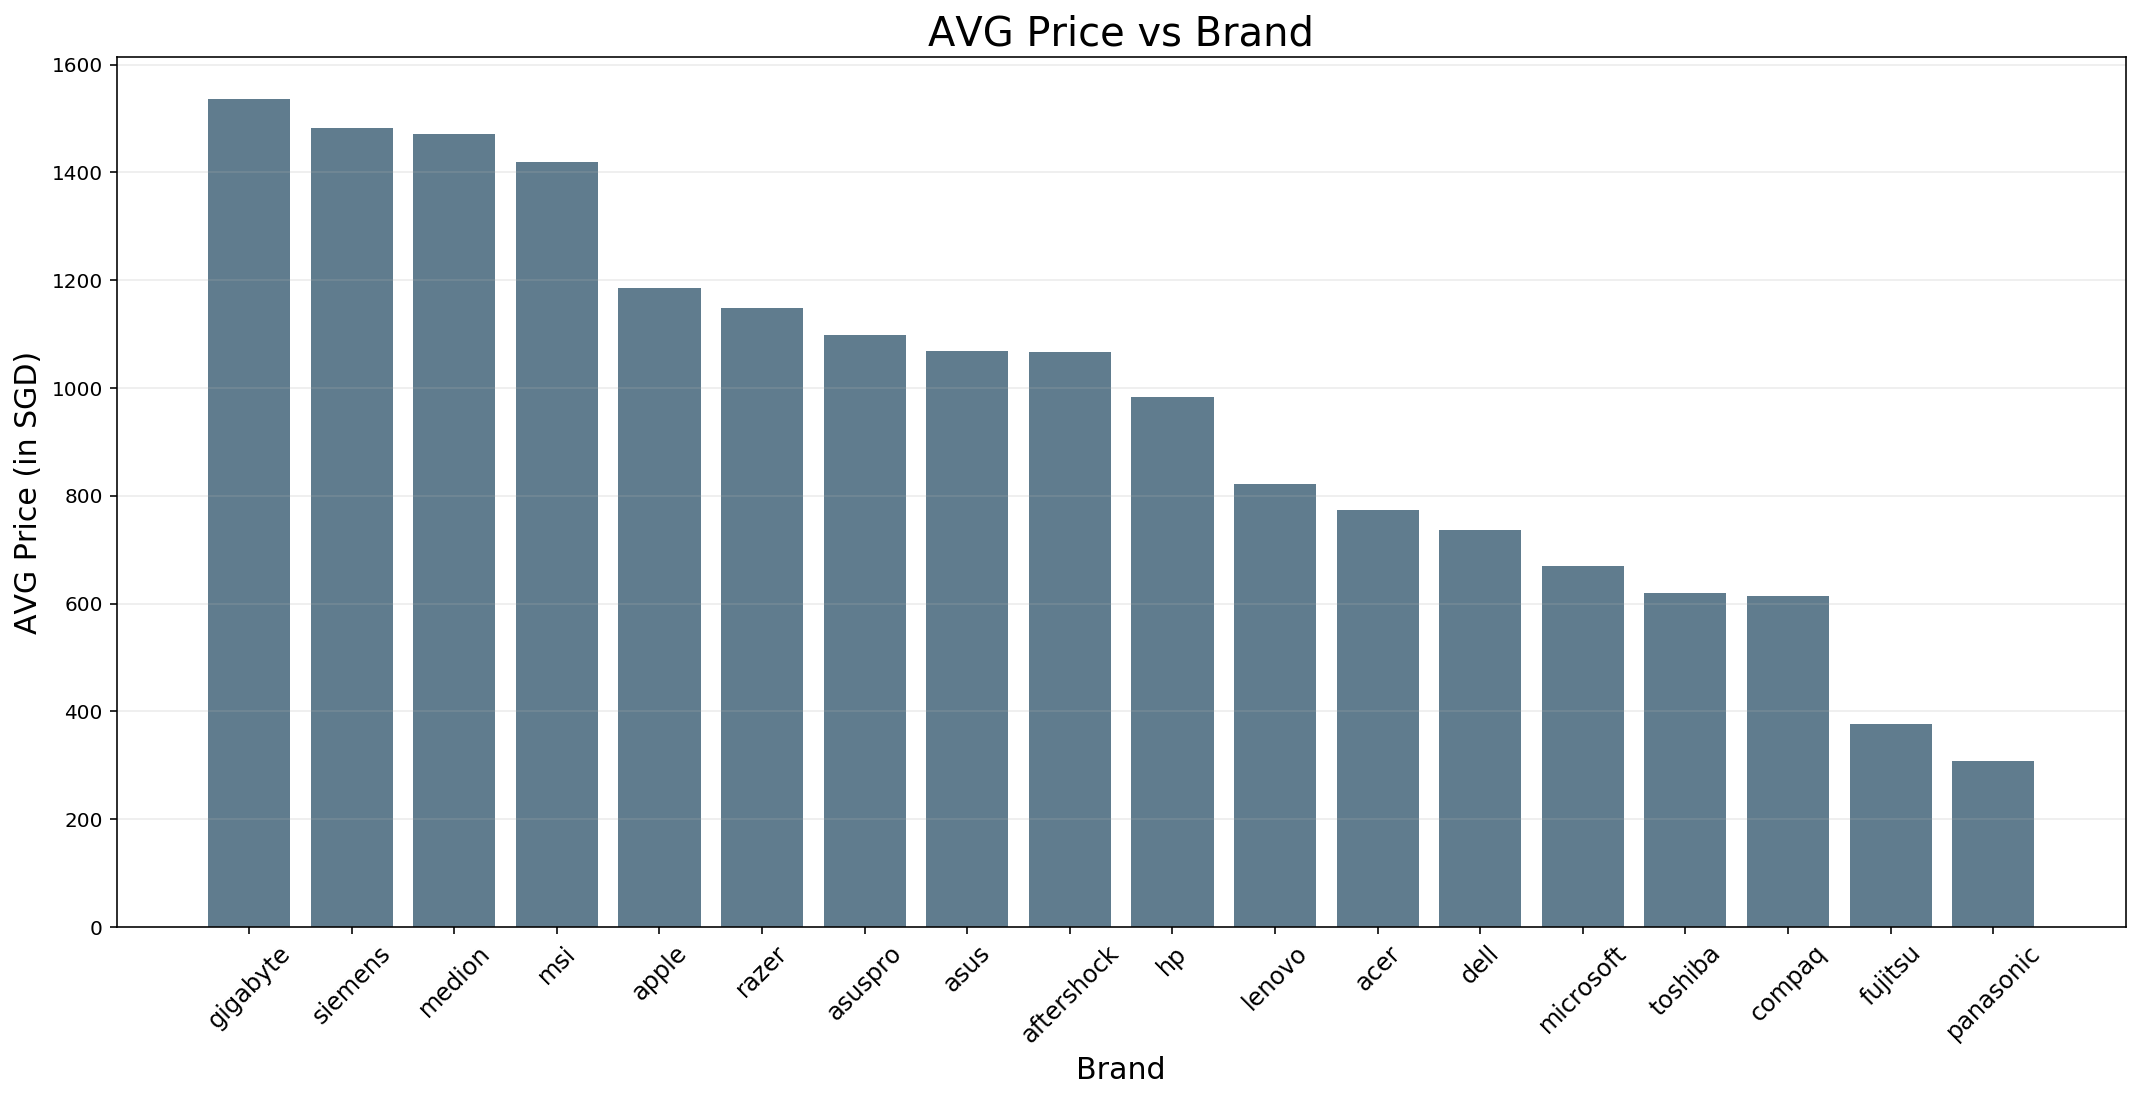

In [10]:
# version 1
colors_map = {'hp': '#003f5c', 
              'dell': '#2f4b7c', 
              'gigabyte': '#665191', 
              'asus': '#a05195', 
              'msi': '#d45087', 
              'siemens': '#f95d6a', 
              'medion': '#ff7c43',
              'apple': '#ffa600', 
              'aftershock': '#488f31', 
              'lenovo': '#bbba78', 
              'razer': '#eddbb9', 
              'asuspro': '#4a3933', 
              'acer': '#e48269',
              'toshiba': '#de425b', 
              'laptop': '#e45826', 
              'microsoft': '#85b172', 
              'compaq': '#f39189', 
              'fujitsu': '#6e7582', 
              'panasonic': '#67a052'}
plt.figure(figsize = (18,8))
# plt.bar(price_brand.index, price_brand.price, color = list(price_brand.index.map(colors_map)))
plt.bar(price_brand.index, price_brand.price, color = '#607c8e')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('AVG Price (in SGD)', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.grid(axis = 'y', linewidth = 0.2)
plt.title('AVG Price vs Brand', fontsize = 20)

<b> Analysis: </b> <br>
Gigabyte is the brand with the highest average refurbished laptop price (~ SGD 1500), while Panasonic is the brand with the lowest average refurbished laptop price (~ SGD 350)

In [12]:
price_brmodel = df[['price', 'brand', 'level_1_model']].groupby(['brand','level_1_model']).mean().sort_values('price', ascending = False).reset_index()
price_brmodel.head()

brand level_1_model        price
0        hp         zbook  2974.714286
1      dell           xps  2696.090000
2  gigabyte          aero  2024.000000
3      asus           rog  1999.000000
4       msi          gf75  1815.040000

In [13]:
price_brmodel.brand.unique()

array(['hp', 'dell', 'gigabyte', 'asus', 'msi', 'siemens', 'medion',
       'apple', 'aftershock', 'lenovo', 'razer', 'asuspro', 'acer',
       'toshiba', 'microsoft', 'compaq', 'fujitsu', 'panasonic'],
      dtype=object)

Text(0.5, 1.0, 'Level 1 Model vs AVG Price')

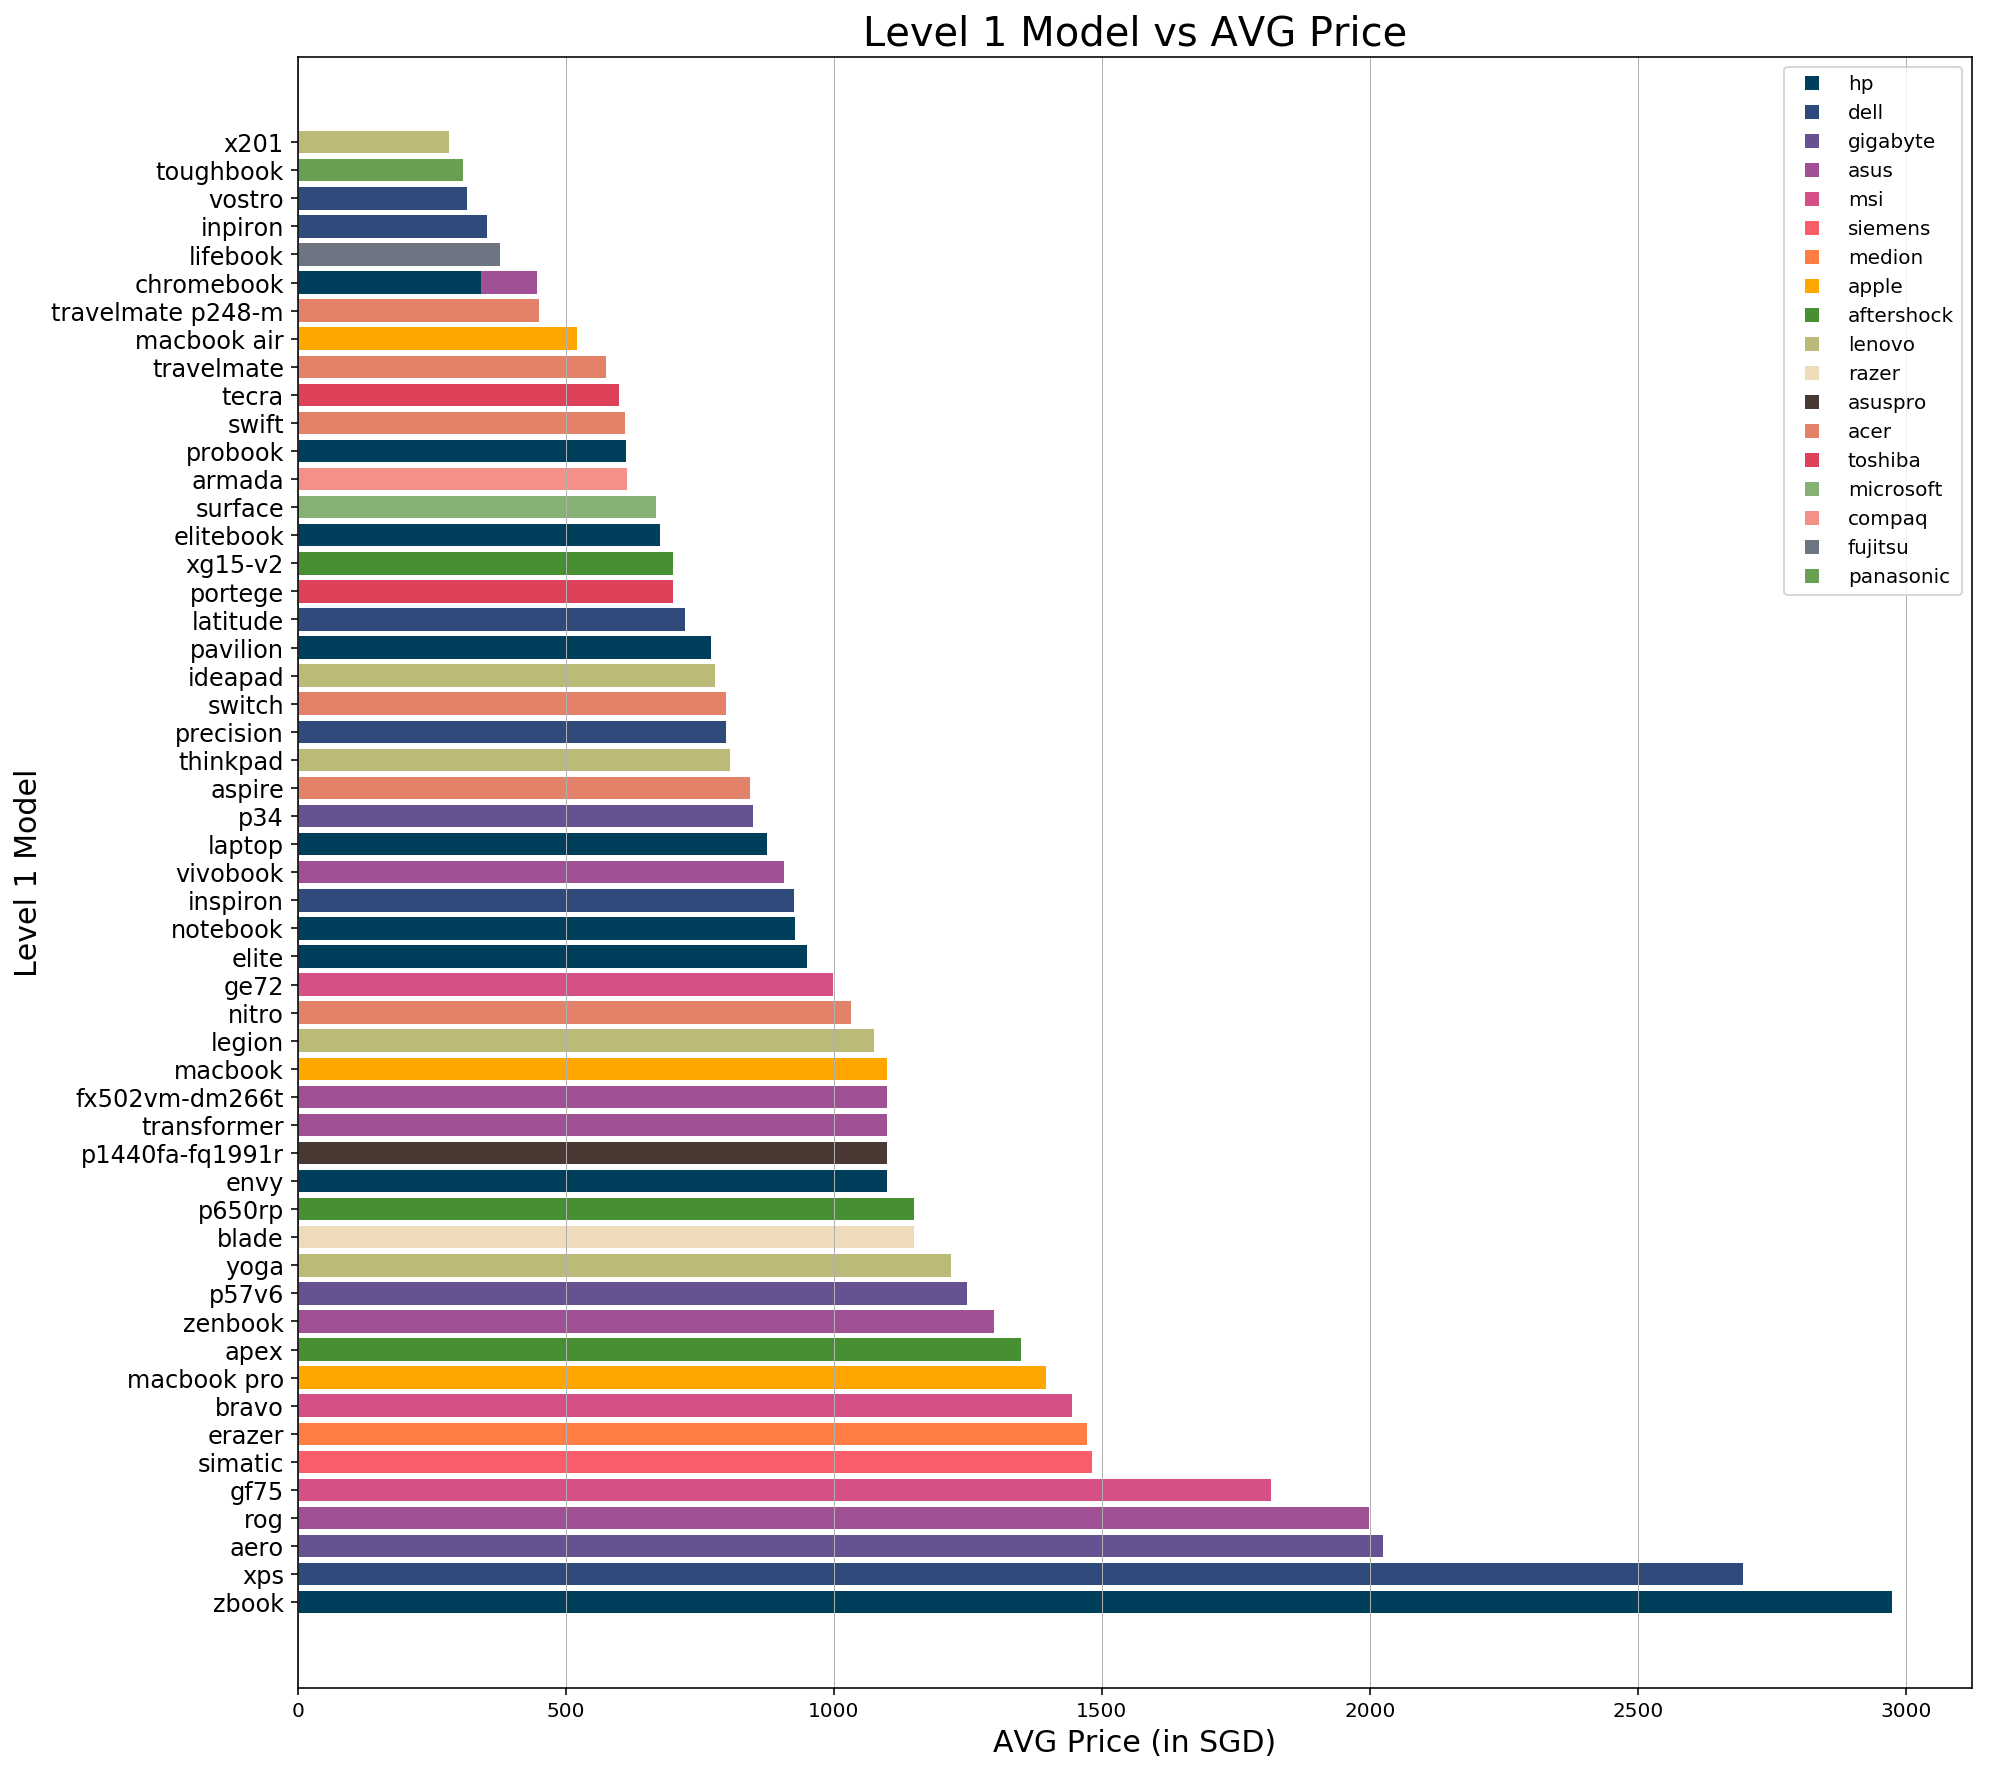

In [14]:
# version 3
colors_map = {'hp': '#003f5c', 
              'dell': '#2f4b7c', 
              'gigabyte': '#665191', 
              'asus': '#a05195', 
              'msi': '#d45087', 
              'siemens': '#f95d6a', 
              'medion': '#ff7c43',
              'apple': '#ffa600', 
              'aftershock': '#488f31', 
              'lenovo': '#bbba78', 
              'razer': '#eddbb9', 
              'asuspro': '#4a3933', 
              'acer': '#e48269',
              'toshiba': '#de425b', 
              'microsoft': '#85b172', 
              'compaq': '#f39189', 
              'fujitsu': '#6e7582', 
              'panasonic': '#67a052'}
plt.figure(figsize = (15,15))
plt.barh(price_brmodel.level_1_model, price_brmodel.price, color = list(price_brmodel.brand.map(colors_map)))
plt.ylabel('Level 1 Model', fontsize = 15)
plt.xlabel('AVG Price (in SGD)', fontsize = 15)
plt.yticks(fontsize = 12)
plt.grid(axis = 'x', linewidth = 0.5)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='s', linestyle='') for color in colors_map.values()]
plt.legend(markers,colors_map.keys(), numpoints=1)
plt.title('Level 1 Model vs AVG Price', fontsize = 20)

<b> Analysis: </b> <br>
Zbook is the model with the highest average refurbished laptop price (~ SGD 470), while x201 is the model with the lowest average refurbished laptop price (~ SGD 350)

In [15]:
brand_c = df['brand'].value_counts()
brand_c.head()

lenovo    82
hp        54
dell      52
apple     43
asus      27
Name: brand, dtype: int64

Text(0.5, 1.0, 'Histogram of Brand')

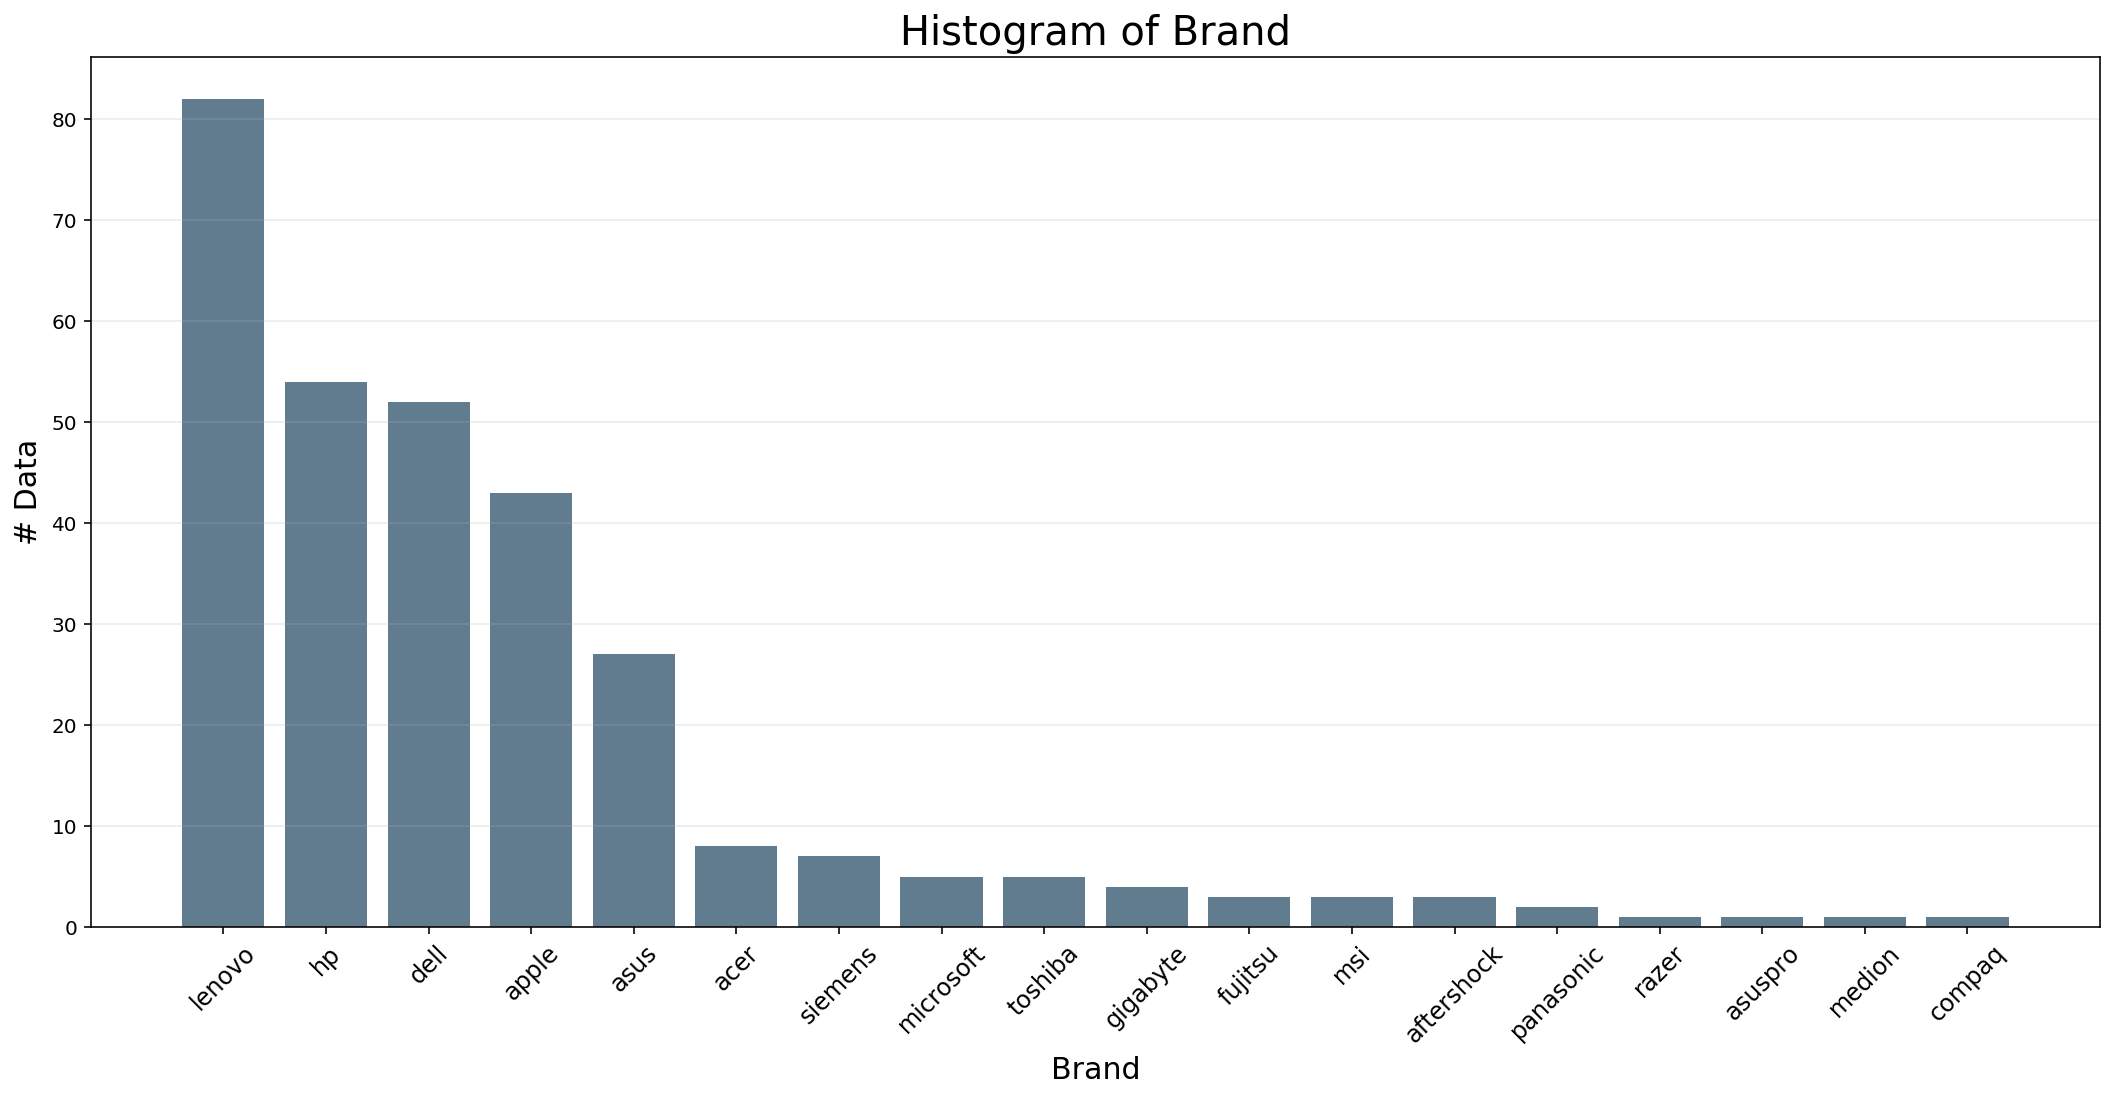

In [16]:
# Histogram of Brand
plt.figure(figsize = (18,8))
plt.bar(brand_c.index, brand_c, color = '#607c8e')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.grid(axis = 'y', linewidth = 0.2)
plt.title('Histogram of Brand', fontsize = 20)

<b> Analysis: </b> <br>
Lenovo has the highest number (31.78%) of listings in refurbished laptops marketplace.

In [17]:
l1model_c = df['level_1_model'].value_counts()
l1model_c.head()

thinkpad       62
latitude       42
macbook pro    30
elitebook      19
ideapad        13
Name: level_1_model, dtype: int64

Text(0.5, 1.0, 'Histogram of Level 1 Model')

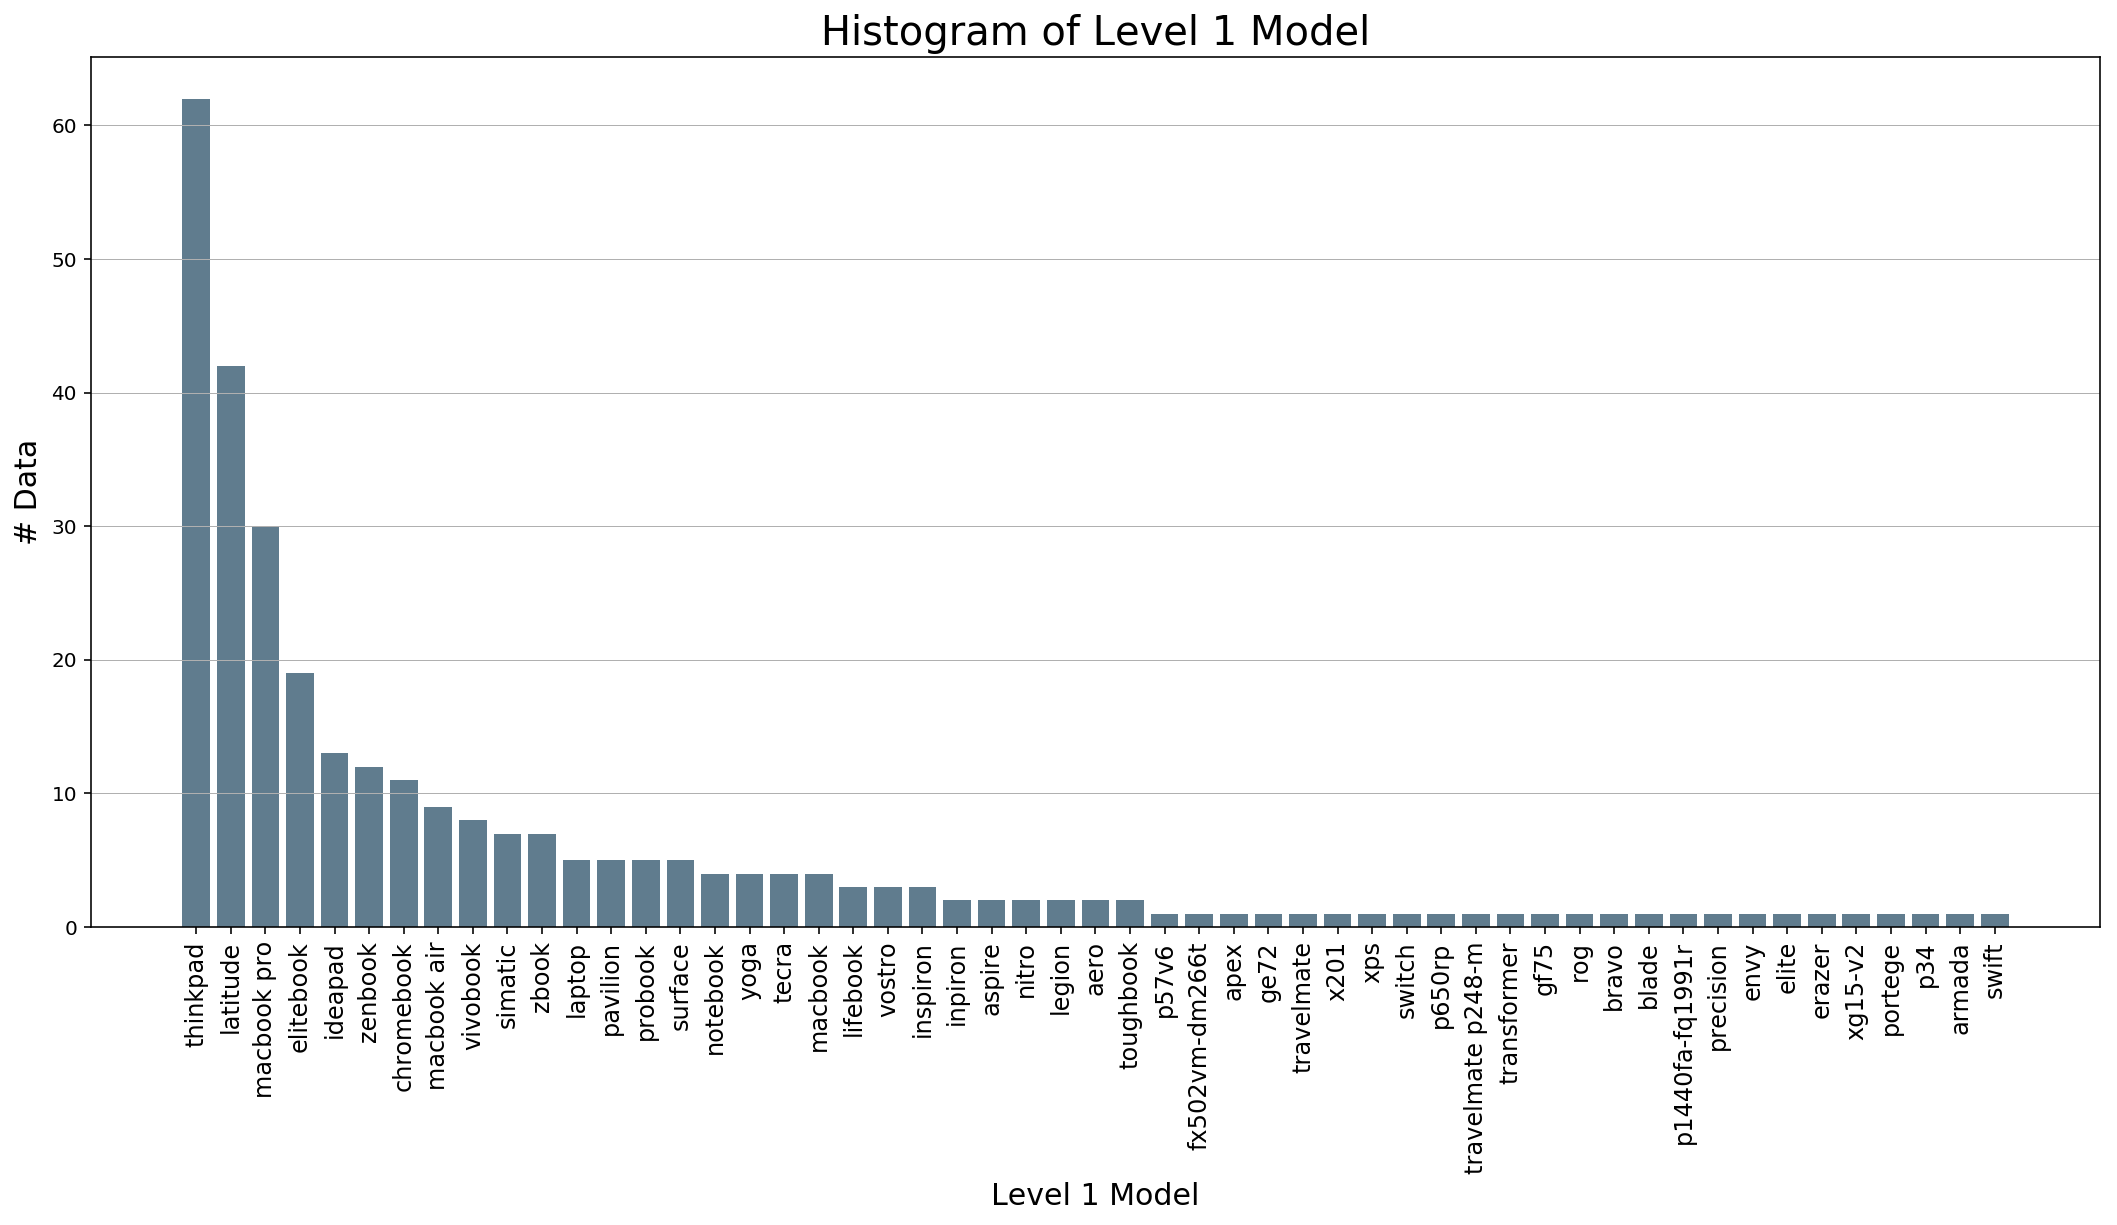

In [18]:
plt.figure(figsize = (18,8))
plt.bar(l1model_c.index, l1model_c, color = '#607c8e')
plt.xlabel('Level 1 Model', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.grid(axis = 'y', linewidth = 0.5)
plt.title('Histogram of Level 1 Model', fontsize = 20)

<b> Analysis: </b> <br>
Thinkpad has the highest number (37.35%) of listings in refurbished laptops marketplace.

Text(0.5, 1.0, 'Histogram of Price')

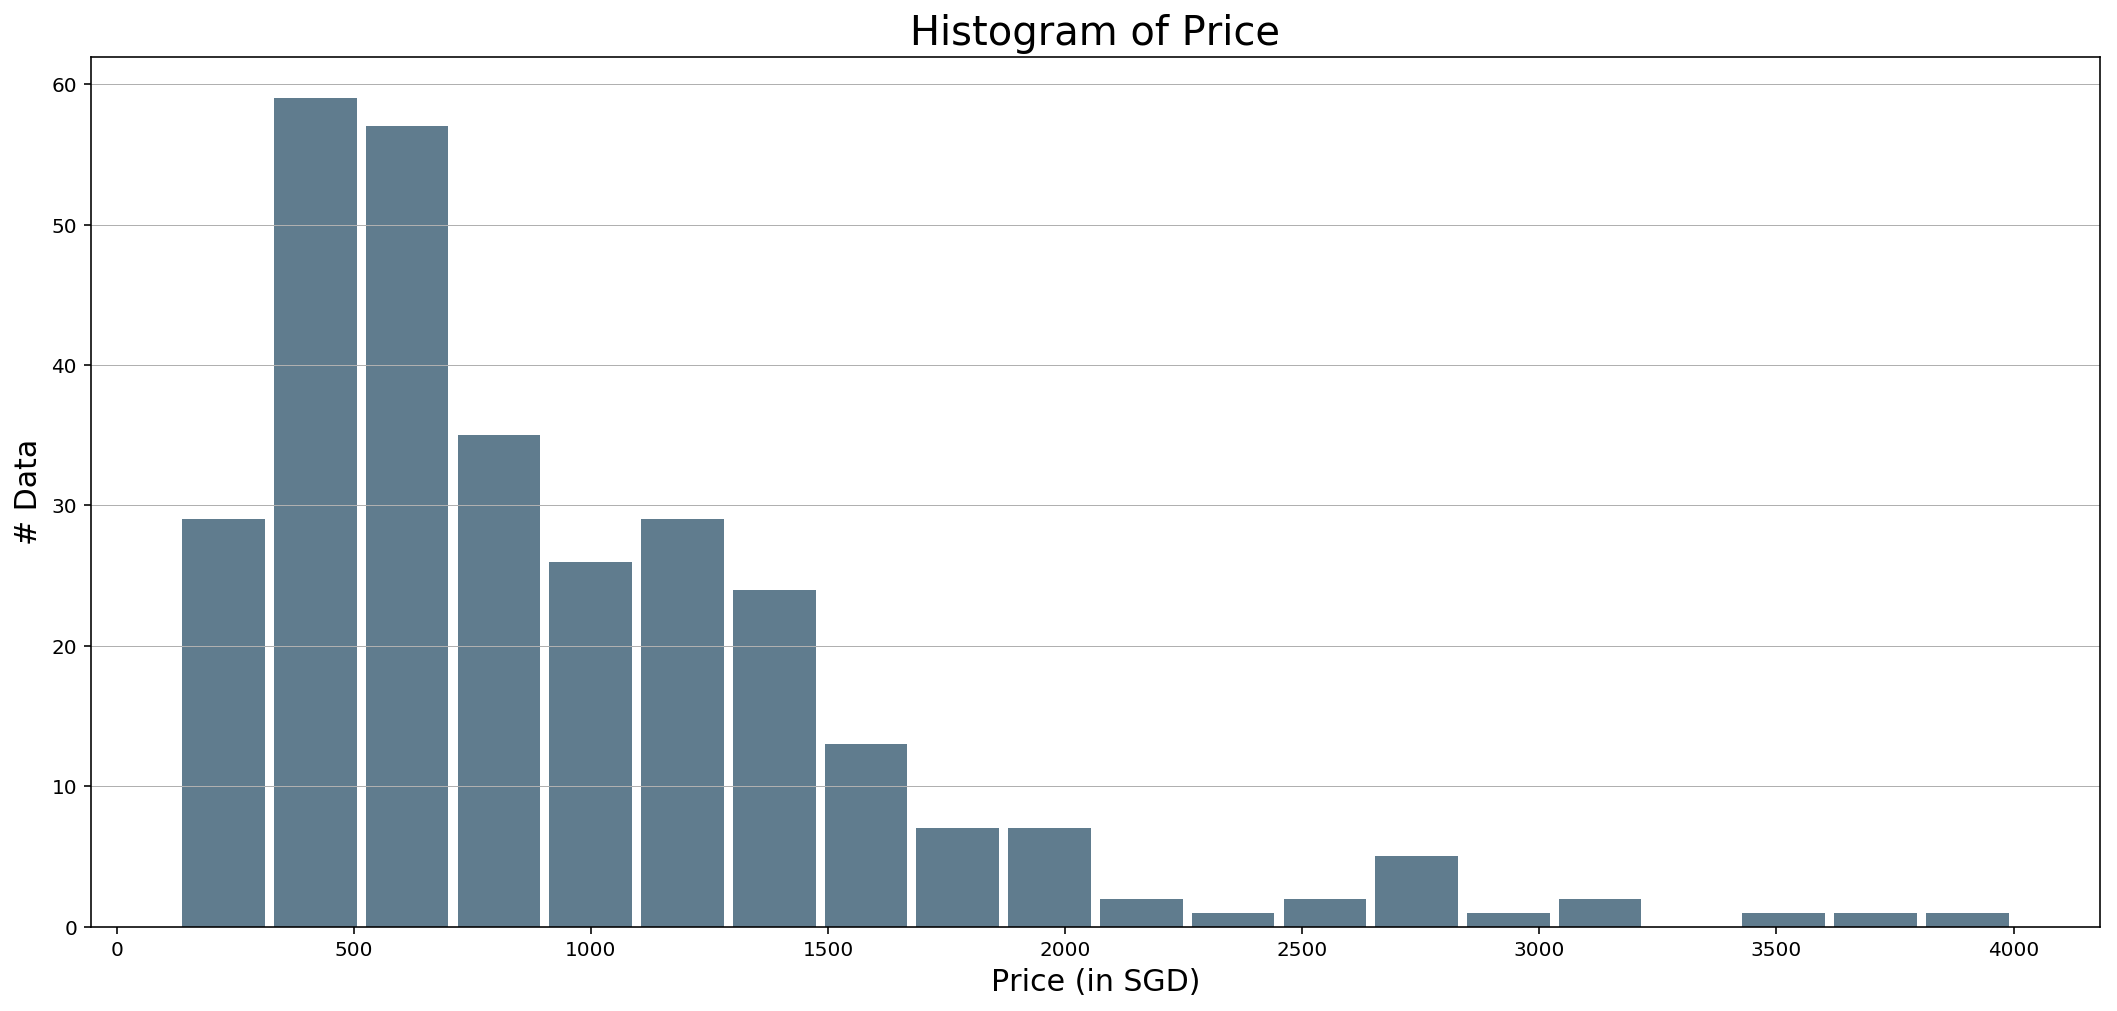

In [19]:
plt.figure(figsize = (18,8))
df['price'].plot.hist(bins = 20, rwidth = 0.9, color = '#607c8e')
plt.xlabel('Price (in SGD)', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
plt.title('Histogram of Price', fontsize = 20)

<b> Analysis: </b> <br>
The distribution of the price of refurbished laptop in Singapore is highly skewed to the right.

## 4.2 Boxplot
[Back to Outline](#Outline)

The analyses that are derived after visualizing the data and outliers with boxplot are the following: 
- Price<br>
There are 14 (4.64%) refurbished laptop data whose <i>price</i> is significantly higher than the laptop's average <i>price</i> in the data. This is possibly due to that these laptops were only used for a short time or the laptops have higher quality of specifications.   
- Screen Size<br>
There are 79 (26.16%) data whose laptop's <i>screen_size</i> are significantly bigger than the average <i>screen_size</i> in the data. The outliers with higher price have <i>screen_size</i> > 15 inches.
- RAM<br>
There are 70 (23.18%) data whose laptop's <i>ram</i> are significantly higher than the average <i>ram</i> in the data. The outliers with higher price have <i>ram</i> > 14 GB.
- Storage<br>
There are 22 (7.28%) refurbished laptop whose <i>storage</i> is significantly higher than the average in the data. The outliers have <i>storage</i> > 896 MB.

After examining the data, we observed that high <i>screen_size</i>, <i>ram</i>, and <i>storage</i> lead to a high <i>price</i>.




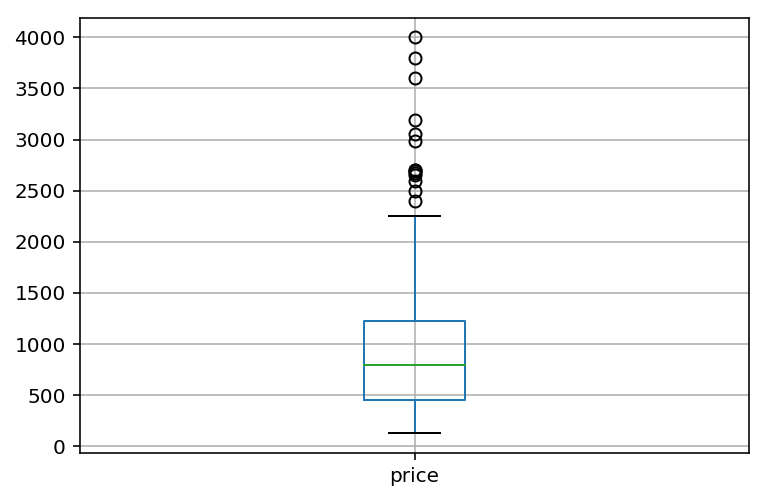

In [20]:
boxplot_price = df.boxplot(column=["price"])

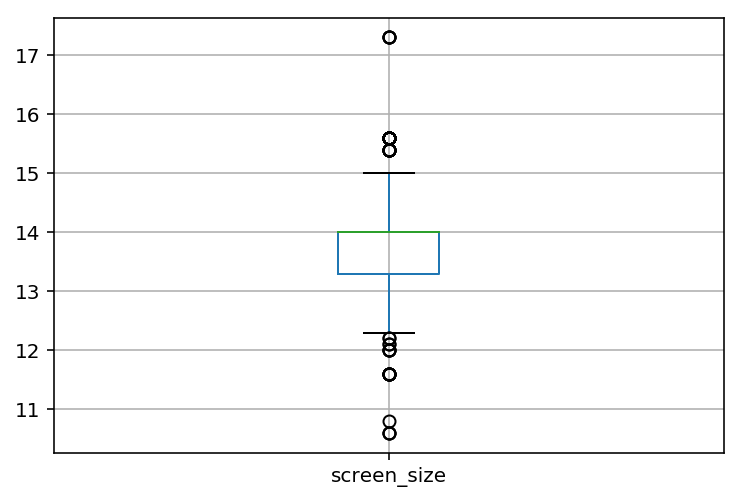

In [21]:
boxplot_screensize = df.boxplot(column=['screen_size']) 

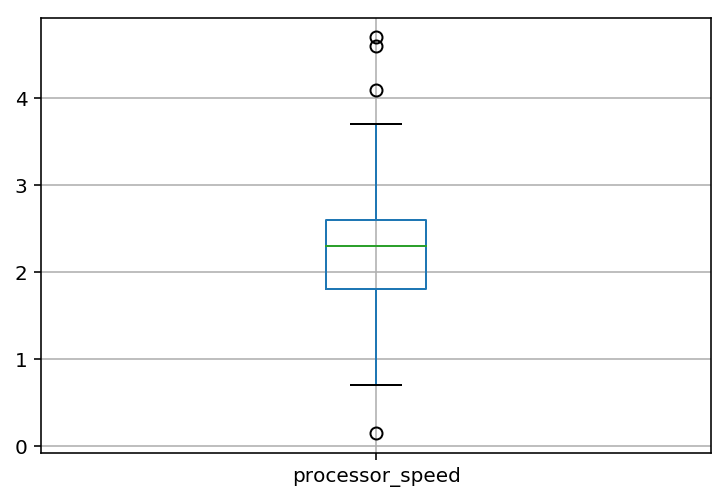

In [22]:
boxplot_processorspeed = df.boxplot(column=['processor_speed'])

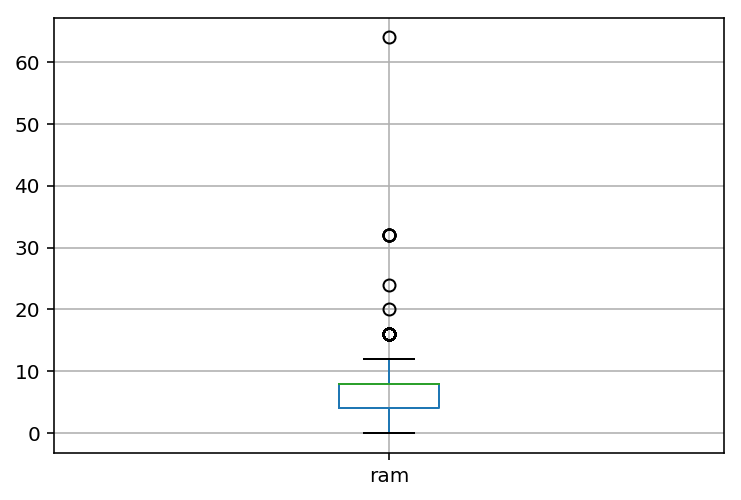

In [23]:
boxplot_ram = df.boxplot(column=['ram'])

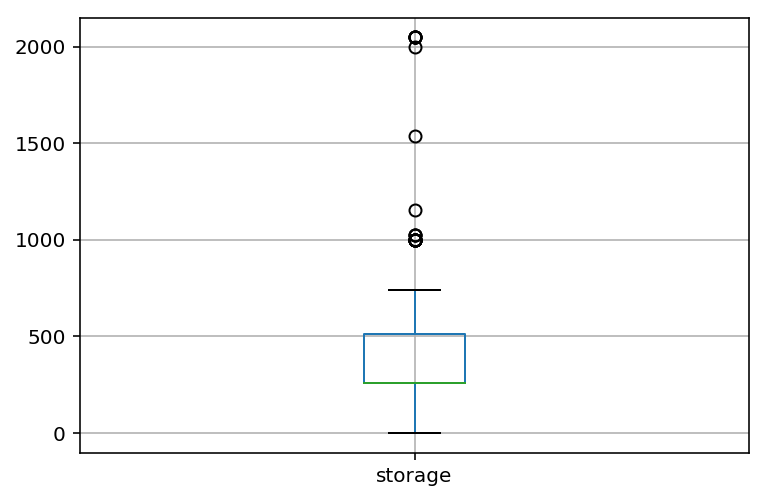

In [24]:
boxplot_storage = df.boxplot(column=['storage'])

In [25]:
#number of outliers for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

brand                  0
graphic_card_exist     0
hdd_exist             64
level_1_model          0
price                 14
processor_speed        4
ram                   70
resolution             0
screen_size           79
ssd_exist             72
storage               22
warranty              61
dtype: int64

## 4.3 Correlation Heatmap (excl. Categorical Features)
[Back to Outline](#Outline)

From the correlation heatmap, it is shown that the features that are highly correlated with <i>price</i> are <i>ram</i>, <i>storage</i>, and <i>screen_size</i>. Therefore, when considering to buy a refurbished laptop, one should consider these features as they can affect the price of the laptop.

In [26]:
df.head(10)

price   brand resolution  screen_size level_1_model  processor_speed  \
0  1230.00   apple      wqxga         13.3   macbook pro              2.6   
1   630.00    dell        fhd         14.0      latitude              2.4   
2   370.00    dell        hd+         14.0      latitude              1.9   
3   310.00    dell       sxga         14.0       inpiron              2.4   
4   395.00    dell       sxga         14.0       inpiron              1.7   
5   315.00    dell         hd         14.0        vostro              2.6   
6   310.00  lenovo         hd         14.0      thinkpad              2.6   
7   420.00    dell         hd         13.3      latitude              2.2   
8   170.00   apple         hd         13.0   macbook air              1.8   
9  1472.12    dell         hd         14.0      latitude              2.0   

    ram  warranty  hdd_exist  ssd_exist  graphic_card_exist  storage  
0  16.0      True      False       True               False    256.0  
1   8.0      True      False       True               False    256.0  
2   8.0      True       True      False               False    500.0  
3   4.0      True       True      False               False    500.0  
4   4.0      True       True      False               False    500.0  
5   4.0      True       True      False               False    500.0  
6   4.0      True      False      False               False      0.0  
7   8.0     False      False       True                True    500.0  
8   8.0     False      False      False               False      0.0  
9  16.0     False      False       True               False   1024.0

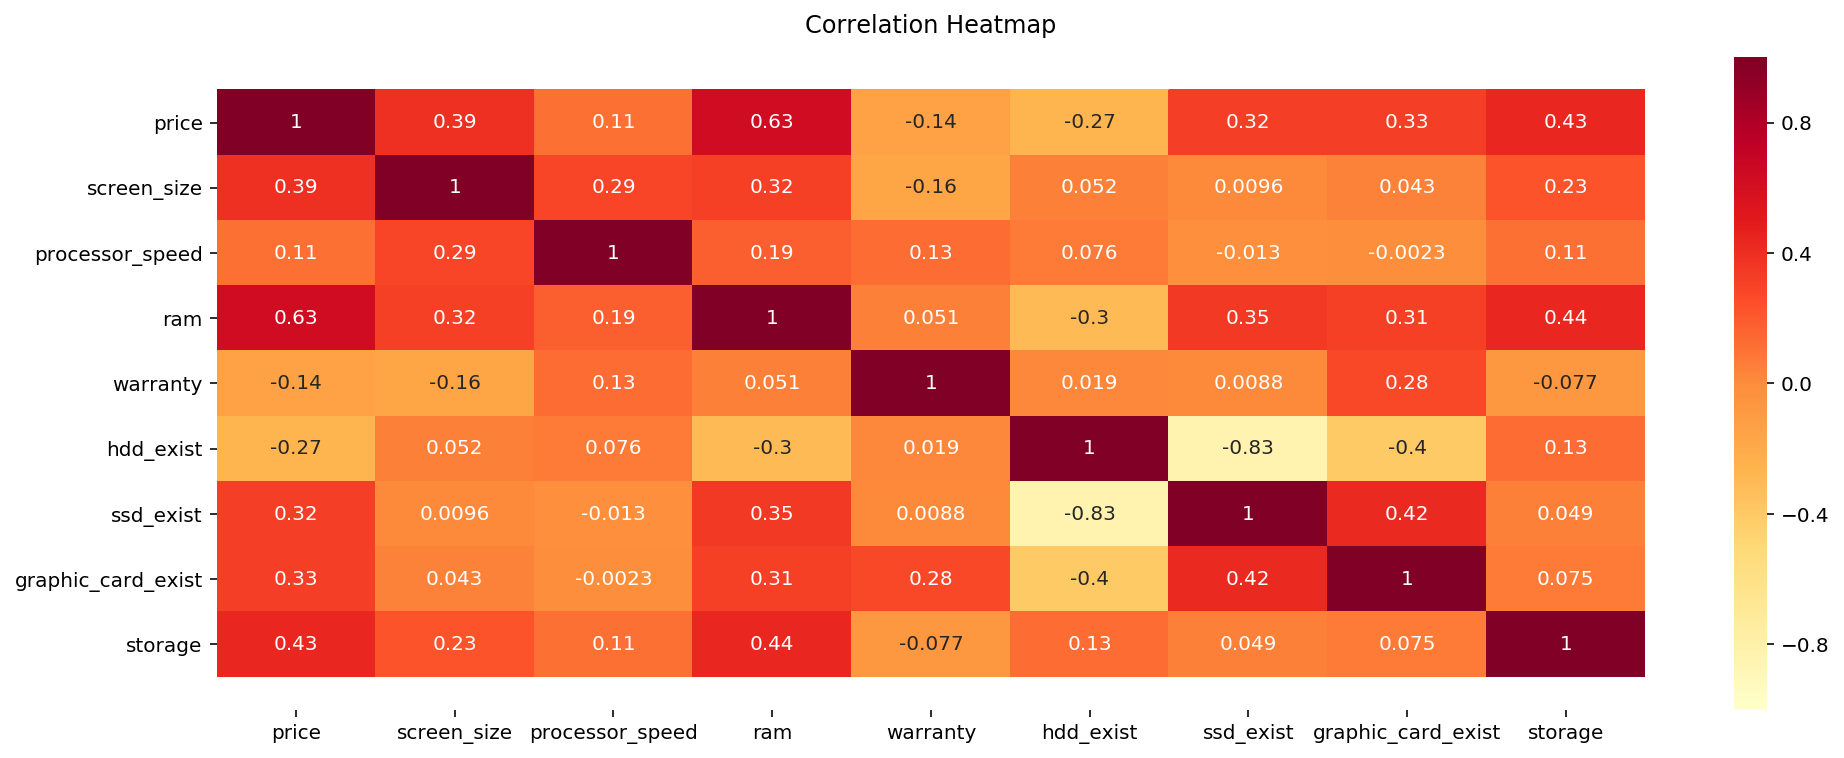

In [27]:
plt.figure(figsize=(16, 6))

# Show correlation between each data values using Pearson Correlation Coefficient (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlOrRd")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Cropped top and bottom part of seaborn heatmap, bug in matplotlib 3.1 (https://github.com/mwaskom/seaborn/issues/1773)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
heatmap

## 4.4 Correlation Heatmap (incl. Categorical Features)
[Back to Outline](#Outline)

### 4.4.1 Encoding
[Back to Outline](#Outline)

### 4.4.1.1 One-Hot Encoding
[Back to Outline](#Outline)

To include categorical features to the regression model, these features have to be encoded into numerical data. As <i>brand</i> and <i>level_1_model</i> do not have a systematic ranking, thus we utilized one-hot encoding. For each value in the categorical feature, a new column is created with a value of 1 if the data is categorized under that feature, 0 otherwise.

In [28]:
encoded_df = df.copy()
columns_to_encode = ["brand", "level_1_model"]
for column_name in columns_to_encode:
    dummies = pd.get_dummies(encoded_df[column_name]).rename(columns=lambda x: column_name + "_" + str(x))
    encoded_df = pd.concat([encoded_df, dummies], axis=1)
    encoded_df = encoded_df.drop(column_name, 1)

### 4.4.1.2 Label Encoding
[Back to Outline](#Outline)

For <i>resolution</i>, a systematic ranking is used since one resolution can produce a better quality of images/videos compared to the other, e.g. QHD+ > VGA. Thus, we implement the following ranking for each resolution present in the data.

| Resolution | Details | Total Pixels | Rank |
| :- | :- | :- | :- |
| vga    | 640 x 480   | 307200  | 1 |
| xga    | 1024 x 768  | 786432  | 2 |
| hd     | 1280 x 720  | 921600  | 3 |
| wxga+  | 1440 x 900  | 1296000 | 4 |
| sxga   | 1280 x 1024 | 1310720 | 5 |
| hd+    | 1600 x 900  | 1440000 | 6 |
| fhd    | 1920 x 1080 | 2073600 | 7 |
| fhd+   | 2220 x 1080 | 2397600 | 8 |
| qhd    | 2560 x 1440 | 3686400 | 9 |
| wqhd   | 2560 x 1440 | 3686400 | 9 |
| wqxga  | 2560 x 1600 | 4096000 | 10 |
| qwxga+ | 2880 x 1800 | 5184000 | 11 |
| qhd+   | 3200 × 1800 | 5760000 | 12 |
| uhd    | 3840 × 2160 | 8294400 | 13 |

Since it is important to preserve this ranking, thus we utilized label encoding according to the rank listed in the table above to encode <i>resolution</i>. <br>

In [29]:
label_encoding = {"vga": 1, "xga": 2, "hd": 3, "wxga+": 4, "sxga": 5, "hd+": 6, "fhd": 7, "fhd+": 8, "qhd": 9, 
                 "wqhd": 9, "wqxga": 10, "qwxga+": 11, "qhd+": 12, "uhd": 13}
encoded_df["resolution"].replace(label_encoding, inplace=True)

In [30]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 81 columns):
price                              302 non-null float64
resolution                         302 non-null int64
screen_size                        302 non-null float64
processor_speed                    302 non-null float64
ram                                302 non-null float64
warranty                           302 non-null bool
hdd_exist                          302 non-null bool
ssd_exist                          302 non-null bool
graphic_card_exist                 302 non-null bool
storage                            302 non-null float64
brand_acer                         302 non-null uint8
brand_aftershock                   302 non-null uint8
brand_apple                        302 non-null uint8
brand_asus                         302 non-null uint8
brand_asuspro                      302 non-null uint8
brand_compaq                       302 non-null uint8
brand_dell               

In [31]:
encoded_df.head(10)

price  resolution  screen_size  processor_speed   ram  warranty  \
0  1230.00          10         13.3              2.6  16.0      True   
1   630.00           7         14.0              2.4   8.0      True   
2   370.00           6         14.0              1.9   8.0      True   
3   310.00           5         14.0              2.4   4.0      True   
4   395.00           5         14.0              1.7   4.0      True   
5   315.00           3         14.0              2.6   4.0      True   
6   310.00           3         14.0              2.6   4.0      True   
7   420.00           3         13.3              2.2   8.0     False   
8   170.00           3         13.0              1.8   8.0     False   
9  1472.12           3         14.0              2.0  16.0     False   

   hdd_exist  ssd_exist  graphic_card_exist  storage  ...  \
0      False       True               False    256.0  ...   
1      False       True               False    256.0  ...   
2       True      False               False    500.0  ...   
3       True      False               False    500.0  ...   
4       True      False               False    500.0  ...   
5       True      False               False    500.0  ...   
6      False      False               False      0.0  ...   
7      False       True                True    500.0  ...   
8      False      False               False      0.0  ...   
9      False       True               False   1024.0  ...   

   level_1_model_travelmate  level_1_model_travelmate p248-m  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   
5                         0                                0   
6                         0                                0   
7                         0                                0   
8                         0                                0   
9                         0                                0   

   level_1_model_vivobook  level_1_model_vostro  level_1_model_x201  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   0   
3                       0                     0                   0   
4                       0                     0                   0   
5                       0                     1                   0   
6                       0                     0                   0   
7                       0                     0                   0   
8                       0                     0                   0   
9                       0                     0                   0   

   level_1_model_xg15-v2  level_1_model_xps  level_1_model_yoga  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   
5                      0                  0                   0   
6                      0                  0                   0   
7                      0                  0                   0   
8                      0                  0                   0   
9                      0                  0                   0   

   level_1_model_zbook  level_1_model_zenbook  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  
5                    0     

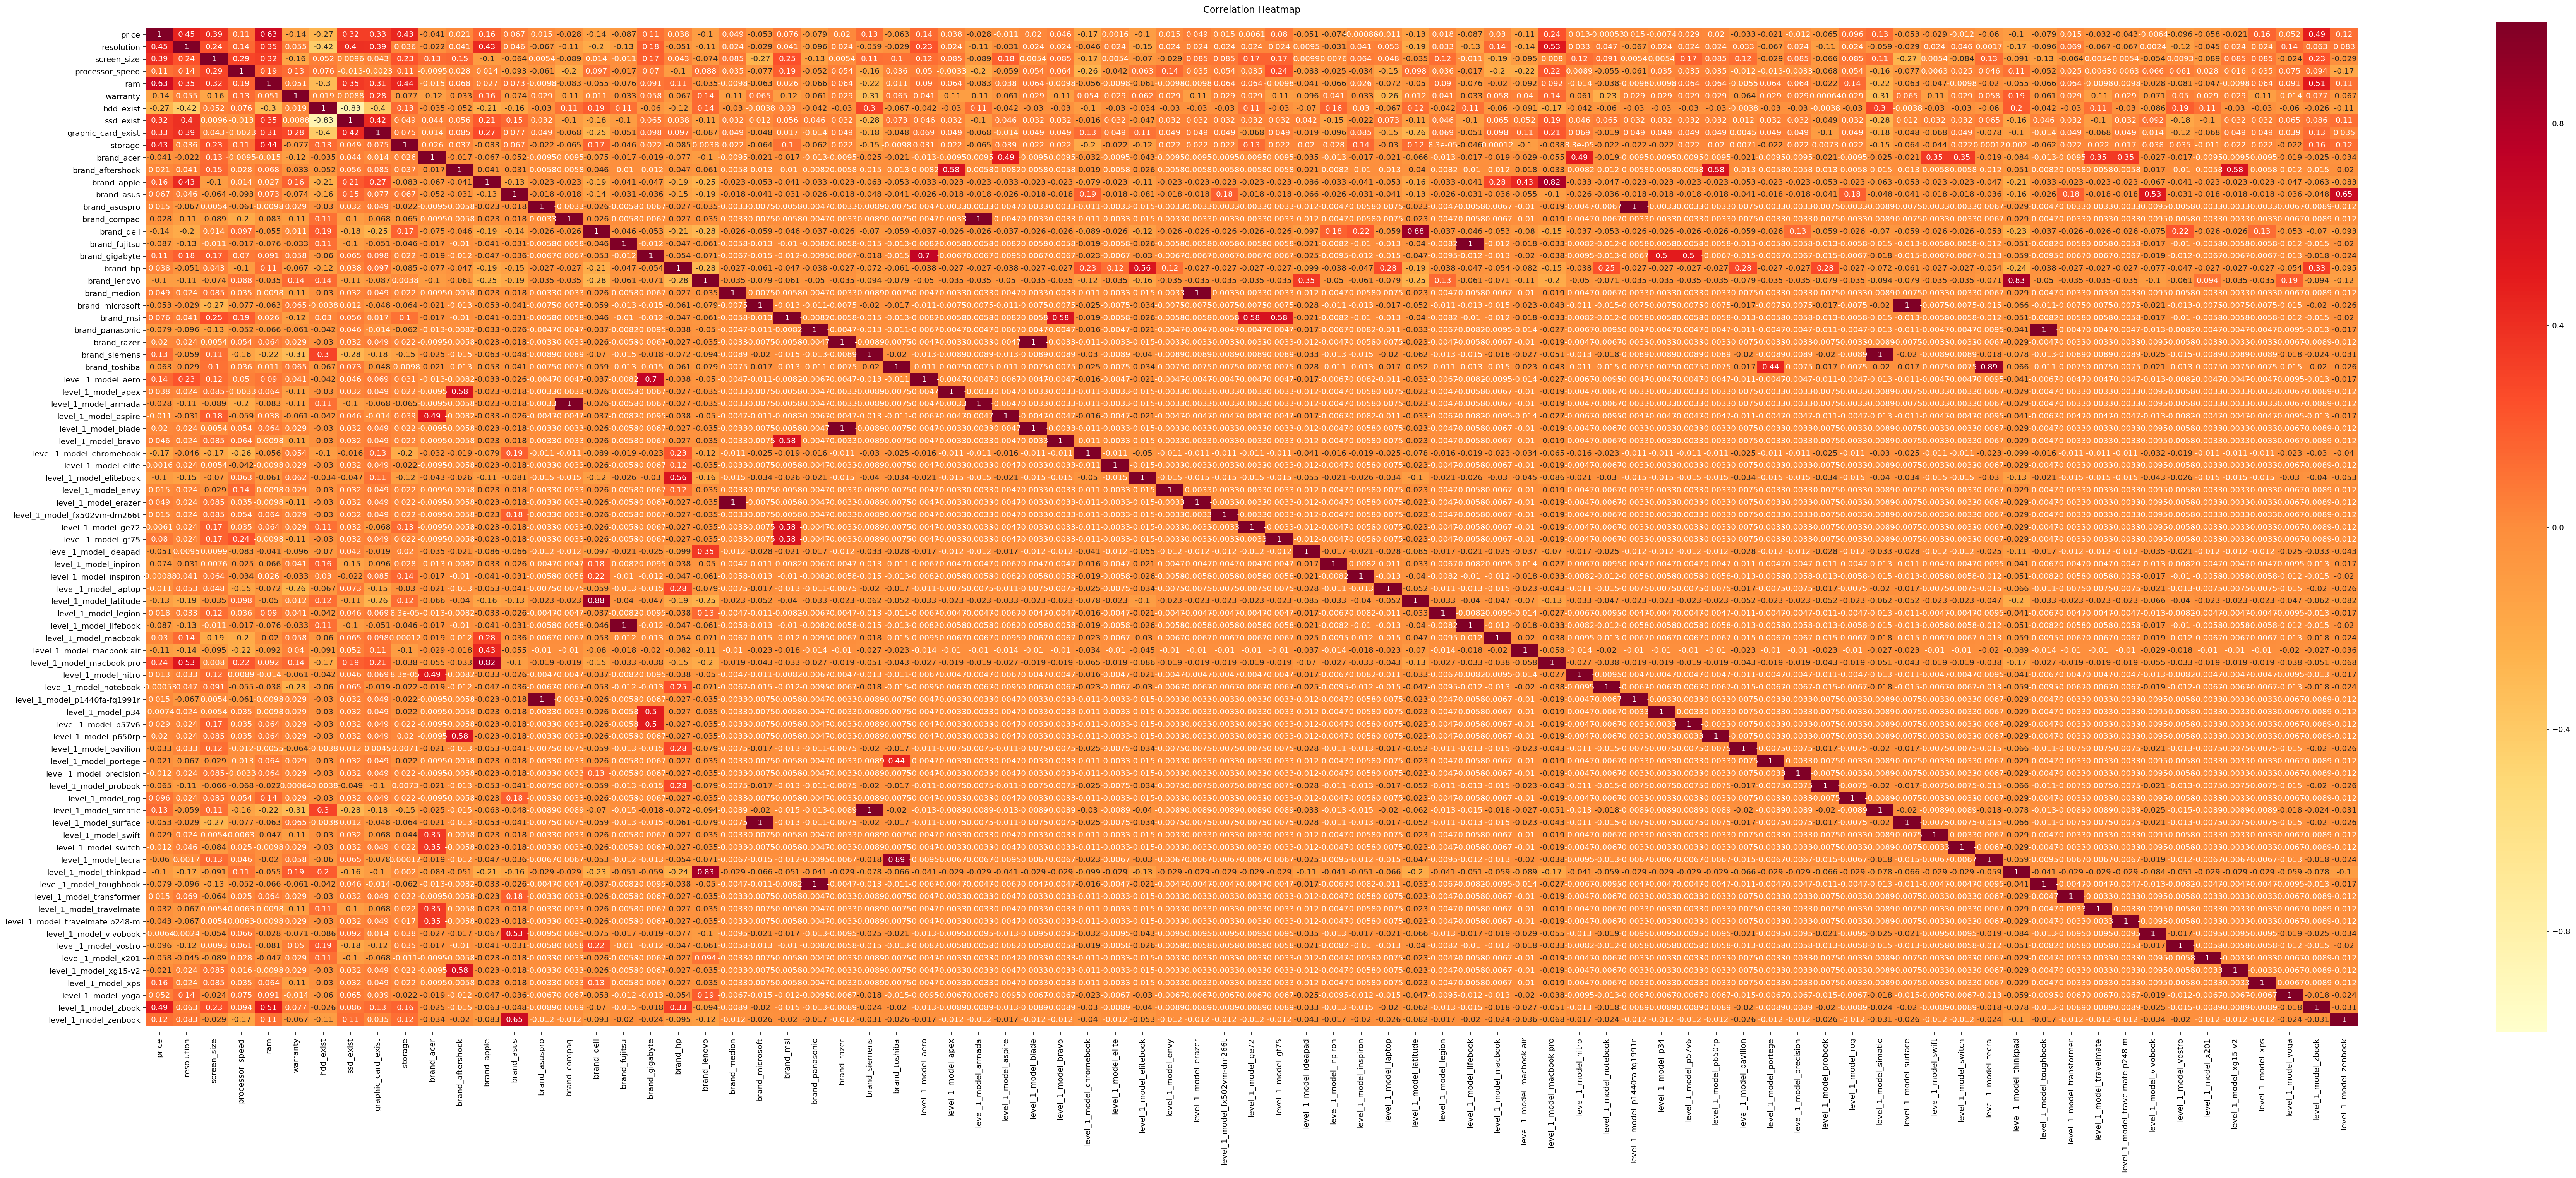

In [32]:
plt.figure(figsize=(64, 24))

# Show correlation between each data values using Pearson Correlation Coefficient (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
heatmap = sns.heatmap(encoded_df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlOrRd")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Cropped top and bottom part of seaborn heatmap, bug in matplotlib 3.1 (https://github.com/mwaskom/seaborn/issues/1773)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
heatmap

# 5. Data Analysis
[Back to Outline](#Outline)

## 5.1 Feature Scaling
[Back to Outline](#Outline)

Feature scaling enhances learning capability with a minimum error. The numerical data will be scaled in the same range of values for the input features to minimize bias. In this project, we used two feature scaling techniques:
- Min-Max Normalization
- Z-Scoring

In [33]:
columns_with_cont_values = ["screen_size", "processor_speed", "ram", "storage"]

### 5.1.1 Min-Max Normalization
[Back to Outline](#Outline)

Min-Max normalization is the most common data normalization technique. The main insight is to normalize for each feature $x_i$ using the following formula:

$$
x_i \leftarrow \frac{x_i}{max_ix_i} \Rightarrow 0 \leq x_i \leq 1
$$

In [34]:
min_max_df = encoded_df.copy()
min_max_df[columns_with_cont_values] = \
    (min_max_df[columns_with_cont_values] - min_max_df[columns_with_cont_values].min()) / \
    (min_max_df[columns_with_cont_values].max() - min_max_df[columns_with_cont_values].min())
min_max_df.head(10)

price  resolution  screen_size  processor_speed       ram  warranty  \
0  1230.00          10     0.402985         0.538462  0.249634      True   
1   630.00           7     0.507463         0.494505  0.124573      True   
2   370.00           6     0.507463         0.384615  0.124573      True   
3   310.00           5     0.507463         0.494505  0.062042      True   
4   395.00           5     0.507463         0.340659  0.062042      True   
5   315.00           3     0.507463         0.538462  0.062042      True   
6   310.00           3     0.507463         0.538462  0.062042      True   
7   420.00           3     0.402985         0.450549  0.124573     False   
8   170.00           3     0.358209         0.362637  0.124573     False   
9  1472.12           3     0.507463         0.406593  0.249634     False   

   hdd_exist  ssd_exist  graphic_card_exist   storage  ...  \
0      False       True               False  0.125000  ...   
1      False       True               False  0.125000  ...   
2       True      False               False  0.244141  ...   
3       True      False               False  0.244141  ...   
4       True      False               False  0.244141  ...   
5       True      False               False  0.244141  ...   
6      False      False               False  0.000000  ...   
7      False       True                True  0.244141  ...   
8      False      False               False  0.000000  ...   
9      False       True               False  0.500000  ...   

   level_1_model_travelmate  level_1_model_travelmate p248-m  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   
5                         0                                0   
6                         0                                0   
7                         0                                0   
8                         0                                0   
9                         0                                0   

   level_1_model_vivobook  level_1_model_vostro  level_1_model_x201  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   0   
3                       0                     0                   0   
4                       0                     0                   0   
5                       0                     1                   0   
6                       0                     0                   0   
7                       0                     0                   0   
8                       0                     0                   0   
9                       0                     0                   0   

   level_1_model_xg15-v2  level_1_model_xps  level_1_model_yoga  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   
5                      0                  0                   0   
6                      0                  0                   0   
7                      0                  0                   0   
8                      0                  0                   0   
9                      0                  0                   0   

   level_1_model_zbook  level_1_model_zenbook  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                   

### 5.1.2 Z-Scoring
[Back to Outline](#Outline)

Z-Scoring is the most common statistical normalization technique. Each feature $x_i$ is normalized with the following formula:

$$
x_i \leftarrow \frac{x_i - \mu}{\sigma}
$$
where $\mu$ and $\sigma$ are the mean value and the standard deviation of feature $x_i$ respectively.

In [35]:
z_scored_df = encoded_df.copy()
z_scored_df[columns_with_cont_values] = \
    (z_scored_df[columns_with_cont_values] - z_scored_df[columns_with_cont_values].mean()) / z_scored_df[columns_with_cont_values].std()
z_scored_df.head(10)

price  resolution  screen_size  processor_speed       ram  warranty  \
0  1230.00          10    -0.509677         0.606441  1.102829      True   
1   630.00           7     0.092928         0.274446 -0.169528      True   
2   370.00           6     0.092928        -0.555543 -0.169528      True   
3   310.00           5     0.092928         0.274446 -0.805707      True   
4   395.00           5     0.092928        -0.887538 -0.805707      True   
5   315.00           3     0.092928         0.606441 -0.805707      True   
6   310.00           3     0.092928         0.606441 -0.805707      True   
7   420.00           3    -0.509677        -0.057550 -0.169528     False   
8   170.00           3    -0.767936        -0.721540 -0.169528     False   
9  1472.12           3     0.092928        -0.389545  1.102829     False   

   hdd_exist  ssd_exist  graphic_card_exist   storage  ...  \
0      False       True               False -0.381302  ...   
1      False       True               False -0.381302  ...   
2       True      False               False  0.347485  ...   
3       True      False               False  0.347485  ...   
4       True      False               False  0.347485  ...   
5       True      False               False  0.347485  ...   
6      False      False               False -1.145931  ...   
7      False       True                True  0.347485  ...   
8      False      False               False -1.145931  ...   
9      False       True               False  1.912586  ...   

   level_1_model_travelmate  level_1_model_travelmate p248-m  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   
5                         0                                0   
6                         0                                0   
7                         0                                0   
8                         0                                0   
9                         0                                0   

   level_1_model_vivobook  level_1_model_vostro  level_1_model_x201  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   0   
3                       0                     0                   0   
4                       0                     0                   0   
5                       0                     1                   0   
6                       0                     0                   0   
7                       0                     0                   0   
8                       0                     0                   0   
9                       0                     0                   0   

   level_1_model_xg15-v2  level_1_model_xps  level_1_model_yoga  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   
5                      0                  0                   0   
6                      0                  0                   0   
7                      0                  0                   0   
8                      0                  0                   0   
9                      0                  0                   0   

   level_1_model_zbook  level_1_model_zenbook  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                   

## 5.2 Models
[Back to Outline](#Outline)

To predict <i>price</i> given refurbished laptop's features <i>resolution</i>, <i>screen_size</i>, <i>processor_speed</i>, <i>ram</i>, <i>warranty</i>, <i>hdd_exist</i>, <i>ssd_exist</i>, <i>graphic_card_exist</i>, <i>storage</i>, <i>brand</i>, and <i>model</i>, we used the following models:
- Polynomial Regression 
- Ridge and Lasso Regression
- Random Forest
- AdaBoost
- XGBoost
- Gradient Boosting Regressor

Before training each model, we divided the dataset into training set (67%) and test set (33%). During training, we used `sklearn.model_selection.GridSearchCV` to let the model find the best hyperparameters as well as perform 10-fold cross validation over the training set. Then, we used Mean Absolute Error (MAE) of the test set as the metric compare the performance of each trained model.

### 5.2.1 Polynomial Regression
[Back to Outline](#Outline)

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in $x$.

The polynomial regression model

$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + ... + \beta_m x_i^m + \varepsilon_i$ ($i = 1, 2, ..., n$)

can be expressed in matrix form in terms of a data matrix $\mathbf {X} $, a predicted result vector $\vec y$, a parameter vector $\beta$, and a vector $\varepsilon$ of random errors. The $i$-th row of $\mathbf {X}$  and $\vec {y}$ will contain the $x$ and $y$ value for the $i$-th data sample. Then the model can be written as a system of linear equations:

$$
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\
y_3 \\
\vdots \\
y_n
\end{array} 
\right]
=
\left[ 
\begin{array}{cccc}
1 & x_1 & x_1^2 & \dots & x_1^m \\ 
1 & x_2 & x_2^2 & \dots & x_2^m \\
1 & x_3 & x_3^2 & \dots & x_3^m \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^m
\end{array} 
\right]
\left[ 
\begin{array}{cccc}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\vdots \\
\beta_n
\end{array} 
\right]
+
\left[ 
\begin{array}{cccc}
\varepsilon_1 \\ 
\varepsilon_2 \\
\varepsilon_3 \\
\vdots \\
\varepsilon_n
\end{array} 
\right]
$$

which can be rewritten in the following matrix form:

$\vec{y} = \mathbf{X}\vec{\beta} + \vec{\varepsilon}$.

In [36]:
def poly_reg_model(x_train, y_train, x_test, y_test, max_deg=3):
    start = time.time()
    param_grid = {
        'polynomial_features__degree': list(range(1, max_deg)),
        'polynomial_features__include_bias': [True, False],
        'linear_regression__fit_intercept': [True, False],
        'linear_regression__normalize': [True, False]}
    
    polynomial_features = PolynomialFeatures()
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    gs_poly = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=10)
    gs_poly.fit(x_train, y_train)
    print('Best training score: ', -gs_poly.best_score_)
    print('Best parameters set found = ', gs_poly.best_params_)
    
    best_poly_model = gs_poly.best_estimator_
    y_pred = best_poly_model.predict(x_test)
    mae_poly = mean_absolute_error(y_test, y_pred)
    print("\nMean Absolute Error for Poly Regressor is: %.0f" % mae_poly)
    print('Poly Regressor computation time = %.2fs' % (time.time() - start))

### 5.2.2 Regularization with Ridge and Lasso Regression
[Back to Outline](#Outline)

In order to prevent overfitting and reduce model complexity in regression model, one needs to utilize regularization method. Two regularization methods that we use in this project are Ridge and Lasso Regression. The difference between the methods is the regularization loss:
1. Regularization loss for Ridge Regression = $\lambda \sum_{j = 0}^{p} \beta^{2}$
2. Regularization loss for Lasso Regression = $\lambda \sum_{j = 0}^{p} \lvert \beta \rvert$

#### 5.2.2.1 Ridge Regression
[Back to Outline](#Outline)

In [37]:
def ridge_model(x_train, y_train, x_test, y_test):
    
    start = time.time()
    
    model = Ridge()
    
    param_grid = {
                'alpha': [1,2,3], 
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'random_state': [28, None],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                } 
    
    gsc = GridSearchCV(estimator = model, param_grid = param_grid,scoring='neg_mean_absolute_error', cv = 10)
    grid_result = gsc.fit(x_train, y_train)
    print('Best training score: ', -grid_result.best_score_)
    print('Best parameters set found = ', grid_result.best_params_)
    
    best_ridge_model = grid_result.best_estimator_
    y_pred = best_ridge_model.predict(x_test)
    mae_ridge = mean_absolute_error(y_test, y_pred)
    print("\nMean Absolute Error for Ridge Regressor is: %.0f" % mae_ridge)
    print('Ridge Regressor computation time = %.2fs' % (time.time() - start))

#### 5.2.2.2 Lasso Regression
[Back to Outline](#Outline)

In [38]:
def lasso_model(x_train, y_train, x_test, y_test):
    
    start = time.time()
    
    model = Lasso()
    
    param_grid = {
                'alpha': [1,2,3], 
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'random_state': [28, None]
                } 
    
    gsc = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_absolute_error', cv = 10)
    grid_result = gsc.fit(x_train, y_train)
    print('Best training score: ', -grid_result.best_score_)
    print('Best parameters set found = ', grid_result.best_params_)
    
    best_lasso_model = grid_result.best_estimator_
    y_pred = best_lasso_model.predict(x_test)
    mae_lasso = mean_absolute_error(y_test, y_pred)
    print("\nMean Absolute Error for Ridge Regressor is: %.0f" % mae_lasso)
    print('Ridge Regressor computation time = %.2fs' % (time.time() - start))

### 5.2.3 Random Forest
[Back to Outline](#Outline)

Random forest or random decision forest is an ensemble learning method that can be used for regression that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (mean/average prediction) of the individual trees.

The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set $X = x_1, ..., x_n$ with responses $Y = y_1, ..., y_n$, bagging repeatedly ($B$ times) selects a random sample with replacement of the training set and fits trees to these samples:

For $b = 1, ..., B$:
1. Sample, with replacement, $n$ training examples from $X$, $Y$; call these $X_b$, $Y_b$.
2. Train a classification or regression tree $f_b$ on $X_b$, $Y_b$.

After training, predictions for unseen samples $x'$ can be made by averaging the predictions from all the individual regression trees on $x'$:

$\hat{f} = \frac{1}{B}\sum_{b=1}^{B} f_{b}(x')$

In [39]:
def random_forest_model(x_train, y_train, x_test, y_test):
    start = time.time()

    # Number of trees in random forest
    n_estimators = [100, 200, 300, 1000]

    # Number of features to consider at every split
    max_features = [2, 3]
    
    # Maximum number of levels in tree
    max_depth = [80, 90, 100, 110]
    max_depth.append(None)
    
    # Minimum number of samples required to split a node
    min_samples_split = [8, 10, 12]
    
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [3, 4, 5]

    # Method of selecting samples for training each tree
    bootstrap = [True]

    # Create the random grid
    param_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap}
    gs_random_forest = GridSearchCV(RandomForestRegressor(criterion="mae"), param_grid, 
                                    scoring='neg_mean_absolute_error', cv=10)
    gs_random_forest.fit(x_train, y_train)
    print('Best training score: ', -gs_random_forest.best_score_)
    print('Best parameters set found = ', gs_random_forest.best_params_)
    
    best_random_forest = gs_random_forest.best_estimator_
    y_pred = best_random_forest.predict(x_test)
    mae_random_forest = mean_absolute_error(y_test, y_pred)
    print("\nMean Absolute Error for Random Forest is: %.0f" % mae_random_forest)
    print('Random Forest computation time = %.2fs' % (time.time() - start))

### 5.2.4 AdaBoost
[Back to Outline](#Outline)

Adaptive Boosting (AdaBoost) is a machine learning algorithm (ensemble learning method) that combines multiple weak learners to build one strong learner by progressively learning from other's wrongly classified objects. The weak learners in AdaBoost are decision trees with a single split (1 node and 2 leaves) called decision stumps. AdaBoost works by putting more weight assigned to the incorrectly classified samples so that they are classified correctly in the next decision stumps. AdaBoost works for both regression and classification problems.

In [40]:
#Ada Boost
def ada_boost_model(x_train, y_train, x_test, y_test):
    start = time.time()
    param_grid = {'n_estimators': [10, 50, 100, 500, 1000], #number of trees
                  'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}
    
    gs_ab = GridSearchCV(AdaBoostRegressor(), param_grid = param_grid, scoring='neg_mean_absolute_error', cv=10)
    gs_ab.fit(x_train, y_train)
    print('Best training score: ', -gs_ab.best_score_)
    print('Best parameters set found = ', gs_ab.best_params_)
    
    best_ab_model = gs_ab.best_estimator_
    y_pred = best_ab_model.predict(x_test)
    mae_ab = mean_absolute_error(y_test, y_pred)
    print("\nMean Absolute Error for AdaBoost is: %.0f" %mae_ab)
    print('AdaBoost computation time = %.2fs' % (time.time() - start))

### 5.2.5 XGBoost
[Back to Outline](#Outline)

Extreme Gradient Boosting (XGBoost) is a scalable and improved version of the gradient boosting algorithm. It has better model performance, computational speed, and efficiency.

XGBoost has features which makes it more robust and flexible, such as:

- Tree Pruning: Pruning prevents overfitting of training data. Pruning reduces the size of regression trees by replacing nodes that do not contribute to improving classification on leaves. XGBoost creates splits up to max_depth specified and starts pruning from backward until the loss is below a threshold.
- Sparsity Awareness: XGBoost handles missing data by assigning them to default direction and finding the best imputation value that minimizes the training loss.

In [41]:
def xgboost_model(x_train, y_train, x_test, y_test):
    start = time.time()
    param_grid = {'eta': [0.001,0.01, 0.1, 0.3, 0.5,0.7, 1], #learning rate, range [0,1]
                    'objective': ['reg:linear'], #loss function
                    'n_estimators': [10, 50, 100, 500, 1000], #number of trees
                    'subsample':[0.2, 0.5, 0.8], #percentage of samples used per tree. Low value can lead to underfitting.
                    'colsample_bytree':[0.2, 0.5, 0.8], #percentage of features used per tree, high value can lead to overfitting
                    'max_depth': [2,3,5] #how deep each tree is allowed to grow during any boosting round
                    }
    
    regressor = XGBRegressor(verbosity=0)
    gs_xgb = GridSearchCV(regressor, param_grid = param_grid, scoring='neg_mean_absolute_error', cv=10)
    gs_xgb.fit(x_train, y_train)
    print('Best training score: ', -gs_xgb.best_score_)
    print('Best parameters set found = ', gs_xgb.best_params_)
    
    best_xgb_model = gs_xgb.best_estimator_
    y_pred = best_xgb_model.predict(x_test)
    mae_xgb = mean_absolute_error(y_test, y_pred)
    print("\nMean Absolute Error for XGBoost is: %.0f" %mae_xgb)
    print('XGBoost computation time = %.2fs' % (time.time() - start))

### 5.2.6 Gradient Boosting Regressor
[Back to Outline](#Outline)

Gradient boosting is one of the most powerful techniques for building predictive models [1]. It combines the predictions from multiple weak learners sequentially to generate a strong predictive model. Some advantages of gradient boosting are:
1. One does not need to pre-process the data (in most cases)
2. It works well with categorical and numerical data

Although Gradient Boosting Regressor tends to be computationally expensive, we believe that the advantages outweigh this disadvantage for our data because our data size is relatively small. Thus, Gradient Boosting Regressor might be a suitable model for our data.

In [42]:
def gbrt_model(x_train, y_train, x_test, y_test):
    
    start = time.time()
    
    model = GradientBoostingRegressor()

    param_grid = {
                'n_estimators': [100,500], 
                'learning_rate': [0.1,0.05,0.5201,0.02],
                'max_depth': [1,2,3,4], 
                'min_samples_leaf': [1,2,3], 
                'max_features': [1.0],
                'random_state': [28],
                'min_samples_split': [2]
                } 
    
    gsc = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_absolute_error', cv=10)
    grid_result = gsc.fit(x_train, y_train)
    print('Best training score: ', -grid_result.best_score_)
    print('Best parameters set found = ', grid_result.best_params_)
    
    best_gbrt_model = grid_result.best_estimator_
    y_pred = best_gbrt_model.predict(x_test)
    mae_gbrt = mean_absolute_error(y_test, y_pred)
    print("\nMean Absolute Error for Gradient Boosting Regressor is: %.0f" %mae_gbrt)
    print('Gradient Boosting Regressor computation time = %.2fs' % (time.time() - start))

# 6. Results
[Back to Outline](#Outline)

### 6.1 Min Max Normalization Data
[Back to Outline](#Outline)

In [43]:
data_input = min_max_df.drop('price',1)
data_output = min_max_df['price']
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=28) 

In [44]:
poly_reg_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  9990.842332724706
Best parameters set found =  {'linear_regression__fit_intercept': False, 'linear_regression__normalize': True, 'polynomial_features__degree': 2, 'polynomial_features__include_bias': False}

Mean Absolute Error for Poly Regressor is: 4344
Poly Regressor computation time = 29.87s


In [45]:
ridge_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  272.76830438605225
Best parameters set found =  {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'random_state': 28, 'solver': 'saga'}

Mean Absolute Error for Ridge Regressor is: 216
Ridge Regressor computation time = 49.91s


In [46]:
lasso_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  261.10481884405937
Best parameters set found =  {'alpha': 3, 'fit_intercept': True, 'normalize': False, 'random_state': 28}

Mean Absolute Error for Ridge Regressor is: 218
Ridge Regressor computation time = 4.33s


In [47]:
random_forest_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  410.5865356435644
Best parameters set found =  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}

Mean Absolute Error for Random Forest is: 326
Random Forest computation time = 1464.17s


In [48]:
ada_boost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  293.66981894742287
Best parameters set found =  {'learning_rate': 0.03, 'n_estimators': 50}

Mean Absolute Error for AdaBoost is: 220
AdaBoost computation time = 140.97s


In [49]:
xgboost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  235.2859575902353
Best parameters set found =  {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'objective': 'reg:linear', 'subsample': 0.8}

Mean Absolute Error for XGBoost is: 214
XGBoost computation time = 3005.95s


In [50]:
gbrt_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  231.55845434633142
Best parameters set found =  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 28}

Mean Absolute Error for Gradient Boosting Regressor is: 216
Gradient Boosting Regressor computation time = 132.59s


### 6.2 Z-Scoring Data
[Back to Outline](#Outline)

In [51]:
data_input = z_scored_df.drop('price',1)
data_output = z_scored_df['price']
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=28) 

In [52]:
poly_reg_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  9030.64151119265
Best parameters set found =  {'linear_regression__fit_intercept': False, 'linear_regression__normalize': True, 'polynomial_features__degree': 2, 'polynomial_features__include_bias': False}

Mean Absolute Error for Poly Regressor is: 4182
Poly Regressor computation time = 18.40s


In [53]:
ridge_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  277.33782867555266
Best parameters set found =  {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'random_state': None, 'solver': 'saga'}

Mean Absolute Error for Ridge Regressor is: 229
Ridge Regressor computation time = 33.62s


In [55]:
lasso_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  262.61144233190106
Best parameters set found =  {'alpha': 1, 'fit_intercept': True, 'normalize': True, 'random_state': 28}

Mean Absolute Error for Ridge Regressor is: 219
Ridge Regressor computation time = 2.89s


In [56]:
random_forest_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  411.5537240099009
Best parameters set found =  {'bootstrap': True, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}

Mean Absolute Error for Random Forest is: 313
Random Forest computation time = 1878.12s


In [57]:
ada_boost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  290.7347331318193
Best parameters set found =  {'learning_rate': 0.1, 'n_estimators': 50}

Mean Absolute Error for AdaBoost is: 242
AdaBoost computation time = 136.55s


In [58]:
xgboost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  235.07499455820212
Best parameters set found =  {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'objective': 'reg:linear', 'subsample': 0.8}

Mean Absolute Error for XGBoost is: 214
XGBoost computation time = 2780.10s


In [59]:
gbrt_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  230.84455117423653
Best parameters set found =  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 28}

Mean Absolute Error for Gradient Boosting Regressor is: 214
Gradient Boosting Regressor computation time = 116.58s


### 6.3 Data without Price Outliers
[Back to Outline](#Outline)

From the boxplot analysis on Section 4.2, we identified several outliers in <i>price</i> (4.64%), <i>screen_size</i> (26.16%), <i>ram</i> (23.18%), and <i>storage</i> (7.28%). We decided to remove the outliers found in <i>price</i> from the data. Removing <i>price</i> outliers will also remove outliers from features <i>screen_size</i>, <i>ram</i>, and <i>storage</i> because in most cases, high <i>screen_size</i>, <i>ram</i>, and <i>storage</i> lead to a high <i>price</i>. Furthermore, if we were to remove all outliers from <i>screen_size</i>, <i>ram</i>, and <i>storage</i>, we would have a very limited number of data left. Thus, after removing the outliers, we re-trained all models to see whether they have a better performance.

In [60]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1
df_without_outlier_price = encoded_df[encoded_df["price"] <= (Q3 + 1.5 * IQR)["price"]]
df_without_outlier_price.head(5)

price  resolution  screen_size  processor_speed   ram  warranty  \
0  1230.0          10         13.3              2.6  16.0      True   
1   630.0           7         14.0              2.4   8.0      True   
2   370.0           6         14.0              1.9   8.0      True   
3   310.0           5         14.0              2.4   4.0      True   
4   395.0           5         14.0              1.7   4.0      True   

   hdd_exist  ssd_exist  graphic_card_exist  storage  ...  \
0      False       True               False    256.0  ...   
1      False       True               False    256.0  ...   
2       True      False               False    500.0  ...   
3       True      False               False    500.0  ...   
4       True      False               False    500.0  ...   

   level_1_model_travelmate  level_1_model_travelmate p248-m  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   level_1_model_vivobook  level_1_model_vostro  level_1_model_x201  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   0   
3                       0                     0                   0   
4                       0                     0                   0   

   level_1_model_xg15-v2  level_1_model_xps  level_1_model_yoga  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   

   level_1_model_zbook  level_1_model_zenbook  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  

[5 rows x 81 columns]

In [61]:
data_input = df_without_outlier_price.drop('price',1)
data_output = df_without_outlier_price['price']
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=28)

In [62]:
poly_reg_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  214.94055127299097
Best parameters set found =  {'linear_regression__fit_intercept': False, 'linear_regression__normalize': True, 'polynomial_features__degree': 1, 'polynomial_features__include_bias': False}

Mean Absolute Error for Poly Regressor is: 180
Poly Regressor computation time = 16.94s


In [63]:
ridge_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  203.68497221277016
Best parameters set found =  {'alpha': 2, 'fit_intercept': False, 'normalize': True, 'random_state': 28, 'solver': 'svd'}

Mean Absolute Error for Ridge Regressor is: 163
Ridge Regressor computation time = 67.16s


In [64]:
lasso_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  204.39242687977347
Best parameters set found =  {'alpha': 3, 'fit_intercept': False, 'normalize': True, 'random_state': 28}

Mean Absolute Error for Ridge Regressor is: 172
Ridge Regressor computation time = 2.65s


In [65]:
random_forest_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  305.05635
Best parameters set found =  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}

Mean Absolute Error for Random Forest is: 286
Random Forest computation time = 1189.73s


In [66]:
ada_boost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  206.40450649436139
Best parameters set found =  {'learning_rate': 1, 'n_estimators': 10}

Mean Absolute Error for AdaBoost is: 212
AdaBoost computation time = 150.89s


In [67]:
xgboost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  183.3234692223867
Best parameters set found =  {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'objective': 'reg:linear', 'subsample': 0.8}

Mean Absolute Error for XGBoost is: 154
XGBoost computation time = 2737.80s


In [68]:
gbrt_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  186.54766980572197
Best parameters set found =  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 28}

Mean Absolute Error for Gradient Boosting Regressor is: 172
Gradient Boosting Regressor computation time = 114.35s


#### 6.3.1 Data without Price Outliers with Min Max Normalization
[Back to Outline](#Outline)

In [69]:
min_max_without_outlier = df_without_outlier_price.copy()
min_max_without_outlier[columns_with_cont_values] = \
    (min_max_without_outlier[columns_with_cont_values] - min_max_without_outlier[columns_with_cont_values].min()) / \
    (min_max_without_outlier[columns_with_cont_values].max() - min_max_without_outlier[columns_with_cont_values].min())
min_max_without_outlier.head(10)

price  resolution  screen_size  processor_speed       ram  warranty  \
0  1230.00          10     0.402985         0.538462  0.499511      True   
1   630.00           7     0.507463         0.494505  0.249267      True   
2   370.00           6     0.507463         0.384615  0.249267      True   
3   310.00           5     0.507463         0.494505  0.124145      True   
4   395.00           5     0.507463         0.340659  0.124145      True   
5   315.00           3     0.507463         0.538462  0.124145      True   
6   310.00           3     0.507463         0.538462  0.124145      True   
7   420.00           3     0.402985         0.450549  0.249267     False   
8   170.00           3     0.358209         0.362637  0.249267     False   
9  1472.12           3     0.507463         0.406593  0.499511     False   

   hdd_exist  ssd_exist  graphic_card_exist   storage  ...  \
0      False       True               False  0.125000  ...   
1      False       True               False  0.125000  ...   
2       True      False               False  0.244141  ...   
3       True      False               False  0.244141  ...   
4       True      False               False  0.244141  ...   
5       True      False               False  0.244141  ...   
6      False      False               False  0.000000  ...   
7      False       True                True  0.244141  ...   
8      False      False               False  0.000000  ...   
9      False       True               False  0.500000  ...   

   level_1_model_travelmate  level_1_model_travelmate p248-m  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   
5                         0                                0   
6                         0                                0   
7                         0                                0   
8                         0                                0   
9                         0                                0   

   level_1_model_vivobook  level_1_model_vostro  level_1_model_x201  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   0   
3                       0                     0                   0   
4                       0                     0                   0   
5                       0                     1                   0   
6                       0                     0                   0   
7                       0                     0                   0   
8                       0                     0                   0   
9                       0                     0                   0   

   level_1_model_xg15-v2  level_1_model_xps  level_1_model_yoga  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   
5                      0                  0                   0   
6                      0                  0                   0   
7                      0                  0                   0   
8                      0                  0                   0   
9                      0                  0                   0   

   level_1_model_zbook  level_1_model_zenbook  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                   

In [70]:
data_input = min_max_without_outlier.drop('price',1)
data_output = min_max_without_outlier['price']
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=28) 

In [71]:
poly_reg_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  217.03551341229934
Best parameters set found =  {'linear_regression__fit_intercept': False, 'linear_regression__normalize': True, 'polynomial_features__degree': 1, 'polynomial_features__include_bias': True}

Mean Absolute Error for Poly Regressor is: 176
Poly Regressor computation time = 17.07s


In [72]:
ridge_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  206.2093681140565
Best parameters set found =  {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'random_state': 28, 'solver': 'svd'}

Mean Absolute Error for Ridge Regressor is: 172
Ridge Regressor computation time = 30.68s


In [73]:
lasso_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  206.17182050130597
Best parameters set found =  {'alpha': 3, 'fit_intercept': False, 'normalize': True, 'random_state': 28}

Mean Absolute Error for Ridge Regressor is: 175
Ridge Regressor computation time = 2.50s


In [74]:
random_forest_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  309.31103359375004
Best parameters set found =  {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}

Mean Absolute Error for Random Forest is: 291
Random Forest computation time = 1208.28s


In [75]:
ada_boost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  211.5497449876673
Best parameters set found =  {'learning_rate': 0.03, 'n_estimators': 500}

Mean Absolute Error for AdaBoost is: 197
AdaBoost computation time = 152.34s


In [76]:
xgboost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  183.04331698099773
Best parameters set found =  {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'objective': 'reg:linear', 'subsample': 0.8}

Mean Absolute Error for XGBoost is: 154
XGBoost computation time = 2730.50s


In [77]:
gbrt_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  186.03379016724827
Best parameters set found =  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 28}

Mean Absolute Error for Gradient Boosting Regressor is: 173
Gradient Boosting Regressor computation time = 113.17s


#### 6.3.2 Data without Price Outliers with Z-Scoring
[Back to Outline](#Outline)

In [78]:
z_scored_without_outlier = df_without_outlier_price.copy()
z_scored_without_outlier[columns_with_cont_values] = \
    (z_scored_without_outlier[columns_with_cont_values] - z_scored_without_outlier[columns_with_cont_values].mean()) / z_scored_without_outlier[columns_with_cont_values].std()
z_scored_without_outlier.head(10)

price  resolution  screen_size  processor_speed       ram  warranty  \
0  1230.00          10    -0.464406         0.615314  1.621854      True   
1   630.00           7     0.146718         0.288448 -0.084352      True   
2   370.00           6     0.146718        -0.528717 -0.084352      True   
3   310.00           5     0.146718         0.288448 -0.937455      True   
4   395.00           5     0.146718        -0.855583 -0.937455      True   
5   315.00           3     0.146718         0.615314 -0.937455      True   
6   310.00           3     0.146718         0.615314 -0.937455      True   
7   420.00           3    -0.464406        -0.038418 -0.084352     False   
8   170.00           3    -0.726317        -0.692150 -0.084352     False   
9  1472.12           3     0.146718        -0.365284  1.621854     False   

   hdd_exist  ssd_exist  graphic_card_exist   storage  ...  \
0      False       True               False -0.356321  ...   
1      False       True               False -0.356321  ...   
2       True      False               False  0.487733  ...   
3       True      False               False  0.487733  ...   
4       True      False               False  0.487733  ...   
5       True      False               False  0.487733  ...   
6      False      False               False -1.241886  ...   
7      False       True                True  0.487733  ...   
8      False      False               False -1.241886  ...   
9      False       True               False  2.300374  ...   

   level_1_model_travelmate  level_1_model_travelmate p248-m  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   
5                         0                                0   
6                         0                                0   
7                         0                                0   
8                         0                                0   
9                         0                                0   

   level_1_model_vivobook  level_1_model_vostro  level_1_model_x201  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   0   
3                       0                     0                   0   
4                       0                     0                   0   
5                       0                     1                   0   
6                       0                     0                   0   
7                       0                     0                   0   
8                       0                     0                   0   
9                       0                     0                   0   

   level_1_model_xg15-v2  level_1_model_xps  level_1_model_yoga  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   
5                      0                  0                   0   
6                      0                  0                   0   
7                      0                  0                   0   
8                      0                  0                   0   
9                      0                  0                   0   

   level_1_model_zbook  level_1_model_zenbook  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                   

In [79]:
data_input = z_scored_without_outlier.drop('price',1)
data_output = z_scored_without_outlier['price']
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=28) 

In [80]:
poly_reg_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  217.40697488161922
Best parameters set found =  {'linear_regression__fit_intercept': False, 'linear_regression__normalize': True, 'polynomial_features__degree': 1, 'polynomial_features__include_bias': True}

Mean Absolute Error for Poly Regressor is: 175
Poly Regressor computation time = 17.05s


In [81]:
ridge_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  204.07791804465774
Best parameters set found =  {'alpha': 2, 'fit_intercept': True, 'normalize': False, 'random_state': 28, 'solver': 'auto'}

Mean Absolute Error for Ridge Regressor is: 163
Ridge Regressor computation time = 27.97s


In [82]:
lasso_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  204.4848746799989
Best parameters set found =  {'alpha': 3, 'fit_intercept': True, 'normalize': False, 'random_state': 28}

Mean Absolute Error for Ridge Regressor is: 173
Ridge Regressor computation time = 2.38s


In [83]:
random_forest_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  308.45879557291664
Best parameters set found =  {'bootstrap': True, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}

Mean Absolute Error for Random Forest is: 295
Random Forest computation time = 1193.15s


In [84]:
ada_boost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  210.2452180123427
Best parameters set found =  {'learning_rate': 0.1, 'n_estimators': 100}

Mean Absolute Error for AdaBoost is: 203
AdaBoost computation time = 149.82s


In [85]:
xgboost_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  183.67063989321392
Best parameters set found =  {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'objective': 'reg:linear', 'subsample': 0.8}

Mean Absolute Error for XGBoost is: 154
XGBoost computation time = 2732.18s


In [86]:
gbrt_model(x_train, y_train, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best training score:  185.70397427547718
Best parameters set found =  {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 28}

Mean Absolute Error for Gradient Boosting Regressor is: 157
Gradient Boosting Regressor computation time = 113.05s


# 7. Conclusion
[Back to Outline](#Outline)

|  |  |  |  | MAE Loss  |  |
| :- | :- | :- | :- | :- | :- |
| Algorithms | Min-Max Normalizations | Z-Scoring | Price Outliers Removed | Price Outliers Removed with Min-Max Normalization | Price Outliers Removed with Z-Scoring |
| Polynomial Regression | 4344 | 4182 | 180 | 176 | 175 |
| Ridge Regression | 216 | 229 | 163 | 172 | 163 |
| Lasso Regression | 218 | 219 | 172 | 175 | 173 |
| Random Forest | 326 | 313 | 286 | 291 | 295 |
| AdaBoost | 220 | 242 | 212 | 197 | 203 |
| XGBoost | 214 | 214 | 154 | 154 | 154 |
| Gradient Boosting Regressor | 216 | 214 | 172 | 173 | 157 |


In conclusion, we have implemented predictive models to predict a refurbished laptop's price given a list of features:
- brand
- resolution
- screen_size
- level_1_model
- processor_speed
- ram
- warranty
- hdd_exist
- ssd_exist
- graphic_card_exist
- storage

Based on the analysis of the scraped data, Lenovo Thinkpad has the highest number of listings in refurbished laptops marketplace in Singapore. This is because of its moderate price compared to other brands and models in the market. This is also supported by [3] that stated that Lenovo Thinkpad has an affordable price, easy-to-upgrade, and easy hardware replacement. 

Furthermore, laptop specifications that have high influence on its price are RAM, storage, and screen size. Thus, one should consider these three features when purchasing a refurbished laptop in Singapore, as the better the quality of these specifications, the higher the price will be. 

After experimenting with multiple models, <i>XGBoost</i> can be used to predict a refurbished laptop's price as it has the lowest Mean Absolute Error (MAE) Loss in the test set. However, XGBoost is computationally expensive as a longer time is needed to train the model.

With this machine learning tool, we hope to increase market awareness and promote the growth of the global refurbished market.

# 8. Challenges and Further Improvements
[Back to Outline](#Outline)

This project has nurtured our team in developing an end-to-end data science project which includes overcoming these challenges:

<b> 1. Missing values data imputation. </b> <br>
As we scraped the data directly from websites, the data were undoubtedly messy and a little sparsed. We were not able to impute values using popular methods such as mean or median data imputation because our data contain quite a number of categorical variables. Therefore, as our number of data is relatively small, we decided to manually impute those missing values. However this method is definitely not recommended when the number of data is large, therefore we suggest automating the whole data imputation process for further improvement of this project. <br> <br>
<b> 2. Different websites required different scraping method because their page structures are different. </b> <br>
In order to obtain more accurate results, one should definitely collect more data from more websites. However, this challenge might hinder one from doing so. Therefore, one might consider to generalize the web scraping method to overcome this challenge in the future. <br> <br>
<b> 3. Polynomial regression with degree larger than 3 and XGBoost are computationally expensive. </b> <br>
Training this model took a lot of time. 

# 9. References
[Back to Outline](#Outline)

[1] https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ <br>
[2] https://medium.com/analytics-vidhya/introduction-to-the-gradient-boosting-algorithm-c25c653f826b <br>
[3] https://laptopfeature.com/why-thinkpad-is-so-popular/